
# Artificial Intelligence II: HW3 Solution

## Headers

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import re
import string
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
nltk.download('stopwords')
import math
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from __future__ import print_function
import scipy
from sklearn.metrics import accuracy_score
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# allocate gpu if possible
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print("Device used for running:", device)

Device used for running: cuda


## Functions for text preprocessing

In this chapter of the notebook, all functions that are relavent to the method of text cleaning, have been implemented.

### Making words with apostrophes into mutiple words

In [ ]:
# Dictionary inspired by https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
# Making words with apostrophes into mutiple words 
# More friendly for computer to understand the meaning of the phrase

contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": " she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's":  "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def split_words_with_apostrophe (X):

  # punctuation = '"'
  flag = 0
  row = 0
  for tweet in X:
      flag = 0
      # tweet = tweet.translate(str.maketrans('', '', punctuation))
      for word in tweet.split():
          if word.lower() in contractions:
              flag=1
              tweet = tweet.replace(word, contractions[word.lower()])  
      if flag==1:
          X.loc[row] = tweet
      row += 1
  
  return X


### Main text preprocess



1. Lowercase
2. Remove stopwords 
3. Remove url & twitter usernames
4. Keep only letters
5. Delete multiple consecutive spaces
6. Lemmatize




In [ ]:
def remove_stopwords(X):
  my_stopwords = stopwords.words('english')
  flag = 0
  row = 0
  for tweet in X:
      flag = 0
      tweet_tokens = word_tokenize(tweet)
      tokens_without_stopwords = []
      for word in tweet_tokens:
        if word not in my_stopwords: 
          tokens_without_stopwords.append(word)
        else: 
          flag = 1
      filtered_tweet = (" ").join(tokens_without_stopwords)
      if flag==1:
          X.loc[row] = filtered_tweet
      row += 1
  return X


def text_preprocess(X):
  
  # Lowercase
  X = X.apply(lambda x: x.lower())
  
  # Remove stopwords
  # https://stackoverflow.com/questions/19560498/faster-way-to-remove-stop-words-in-python
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  X = X.apply(lambda x: pattern.sub('', x))

  # Remove url
  X = X.apply(lambda x: re.sub(r'http\S+', ' ', x))

  # Remove tweeter usernames
  X = X.apply(lambda x: re.sub('@[^\s]+',' ',x))

  # Remove words with len equals to 1
  X = X.apply(lambda x: re.sub(r'(?:^| )\w(?:$| )', ' ', x).strip())

  # Keep only letters
  X = X.apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))

  # Delete multiple consecutive spaces
  X = X.apply(lambda x: ' '.join(x.split()))

  # Lemmatizing teq
  lemmatizer = WordNetLemmatizer()
  X = X.apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.rstrip().split()]))

  return X

## Defining LSTM/GRU models and Attention


In [ ]:
# https://www.kaggle.com/mlwhiz/attention-pytorch-and-keras
# https://towardsdatascience.com/create-your-own-custom-attention-layer-understand-all-flavours-2201b5e8be9e

class Attention(nn.Module):
  def __init__(self, hidden_dim, seq_len, num_units):
      super(Attention, self).__init__()
      
      self.hidden_dim = hidden_dim
      self.seq_len = seq_len
      self.num_units = num_units

      w = torch.zeros(self.hidden_dim*2, self.num_units)
      nn.init.kaiming_uniform_(w)
      self.w = nn.Parameter(w) # layer weights
      self.b = nn.Parameter(torch.zeros(self.seq_len, self.num_units)) # attention weights
  
  def forward(self, h):
      e = torch.tanh(torch.matmul(h, self.w)+self.b) 
      # e = torch.flatten(e)
      a = F.softmax(e, dim=1)

      temp = a.repeat(1,1,self.hidden_dim*2)
      # temp = temp.permute(0, 2, 1)
      out = torch.multiply(h, temp)
      out = torch.sum(out, dim=1)
      return out # shape [batch_size, 2*hidden_size]

# https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, output_size, embedding_dim, hidden_dim, n_layers, cell_type, attention, drop_prob=0):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        cells = {
          "LSTM"    : nn.LSTM,
          "GRU"     : nn.GRU
        }

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        self.cell_type = cell_type
        self.embedding_dim = embedding_dim
        self.attention = attention

        self.rnn = cells[cell_type](
            input_size = embedding_dim,
            hidden_size = hidden_dim,
            num_layers = n_layers,
            batch_first = True,
            dropout = drop_prob,
            bidirectional = True
        )
        
        # dropout layer
        if (self.n_layers == 1):
          self.dropout = nn.Dropout(0.0)
        else:
          self.dropout = nn.Dropout(drop_prob)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim*2, output_size)
        self.sig = nn.Sigmoid()

        # attention layer
        if self.attention == True:
          # self.attention_layer = nn.Linear(self.hidden_dim*2, self.output_size)
          self.attention_layer = Attention(self.hidden_dim, seq_length, 1)

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.shape[0]
        
        # x.shape -> [batch_size, seq_len, embedding_size], out.shape -> [batch_size, seq_len, 2*hidden_dim]
        out, hidden = self.rnn(x, hidden) 
        
        if self.attention == True:
          out = self.attention_layer(out)

        else:
            # stack up lstm outputs
            out = out.contiguous().view(-1, self.hidden_dim*2) 

        # dropout and fully-connected layer
        out = self.dropout(out)
        out = self.fc(out)

        # reshape to be batch_size first
        out = out.view(batch_size, -1, self.output_size) # out.shape -> [batch_size, seq_len, 3]

        out = out[:, -1, :] # get last batch of labels , out.shape -> [batch_size, 3]
        
        # return last sigmoid output and hidden state
        return out, hidden


    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
  
        if self.cell_type == 'LSTM':
          hidden = (weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_().to(device),
                    weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_().to(device))
        if self.cell_type == 'GRU':
          hidden = weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_().to(device)

        return hidden
        

## Generating input (TF-IDF, Glove) and output (target) tensor

In [ ]:
def create_embedding_matrix(tweet, embedding_dict, dimension, seq_length):
  temp_word_count = 0
  tweet_tokens = word_tokenize(tweet)
  embedding_matrix=np.zeros((seq_length,dimension))
  for word in tweet_tokens:
    if word in embedding_dict:
      temp_word_count += 1
      if temp_word_count > seq_length:
        break
      embedding_matrix[temp_word_count-1]=embedding_dict[word]
  
  if temp_word_count < seq_length:
    embedding_matrix[temp_word_count:seq_length] = np.zeros((1, dimension))

  return torch.from_numpy(embedding_matrix)


In [ ]:
def make_target(label):
  if label == 0:
    return torch.tensor([1, 0, 0])
  elif label == 1:
    return torch.tensor([0, 1, 0])
  else:
    return torch.tensor([0, 0, 1])

In [ ]:
def one_hot_reverse_matrix(data):
  data_size = data.shape[0] 
  # reshaped_data = torch.empty(size=(data_size, 1))
  reshaped_data = torch.ones(data_size).to(device)
  for i in range(data_size):
      if torch.equal(data[i], torch.tensor([1., 0., 0.]).to(device)):
        reshaped_data[i] = torch.tensor([0.])
      elif torch.equal(data[i], torch.tensor([0., 1., 0.]).to(device)):
        reshaped_data[i] = torch.tensor([1.])
      else:
        reshaped_data[i] = torch.tensor([2.])
  return reshaped_data

## Reading process

### Reading Glove data

In [ ]:
!wget https://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip

--2022-01-30 10:23:29--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2022-01-30 10:23:29--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  5.07MB/s    in 4m 46s  

2022-01-30 10:28:14 (5.08 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.2

In [ ]:
glove = pd.read_csv('glove.twitter.27B.200d.txt', sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}
embedding_size = list(glove_embedding.values())[0].shape[0]

### Reading train and validation data

<b>NOTE!</b> In order to run the cell below, firstly you have to do the following: 

1.   Create a folder with the name ```Vaccine Sentiment Dataset```.
2.   Upload under that location the files ```vaccine_train_set.csv```, and ```vaccine_validation_set.csv```.

Besides reading in this cell we preprocess and save in ternsors our data...

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# Reading vaccine train set and validation set
train_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_train_set.csv")
validation_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_validation_set.csv")

# Check for null values
# In this case there are no missing values, so no action is needed
if train_set.isnull().values.any()==False and train_set.isnull().values.any()==False:
  print("No missing values in our datasets!\n")  
else:
  train_set = train_set.fillna(0)
  validation_set = validation_set.fillna(0)

# Separate features (inputs) from targets (outputs)
X_train = train_set['tweet'] 
Y_train = train_set['label'].to_numpy().astype('int')
X_validation = validation_set['tweet'] 
Y_validation = validation_set['label'].to_numpy().astype('int')

# Preprocess train set  
X_train = split_words_with_apostrophe(X_train)
X_train = text_preprocess(X_train)

# Preprocess validation set 
X_validation = split_words_with_apostrophe(X_validation)
X_validation = text_preprocess(X_validation)

# Define sequence length of tweets
# Make sequence length equal to mean tweet length
len_of_tweets = []
for tweet in X_train:
  len_of_tweets.append(len(tweet.split()))
seq_length = math.ceil(sum(len_of_tweets)/len(len_of_tweets))

# Saving in tensors for train set (Glove Model)
train_size = X_train.shape[0]
X_train_tensor = torch.empty(size=(train_size, seq_length, embedding_size))
Y_train_tensor = torch.empty(size=(train_size, 3))
for i in range(train_size):
    X_train_tensor[i] = create_embedding_matrix(X_train[i],embedding_dict=glove_embedding,dimension=embedding_size, seq_length=seq_length)
for i in range(train_size):
    Y_train_tensor[i] = make_target(Y_train[i])

# Saving in tensors for validation set  (Glove Model)
validation_size = X_validation.shape[0] 
X_validation_tensor = torch.empty(size=(validation_size, seq_length, embedding_size))
Y_validation_tensor = torch.empty(size=(validation_size, 3))
for i in range(validation_size):
    X_validation_tensor[i] = create_embedding_matrix(X_validation[i],embedding_dict=glove_embedding,dimension=embedding_size, seq_length=seq_length)
for i in range(validation_size):
    Y_validation_tensor[i] = make_target(Y_validation[i])
    

No missing values in our datasets!



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
print("Train Stats---\nLabel 0:", np.count_nonzero(Y_train == 0), "samples")
print("Label 1:", np.count_nonzero(Y_train == 1), "samples")
print("Label 2:", np.count_nonzero(Y_train == 2), "samples")

print("\nValidation Stats---\nLabel 0:", np.count_nonzero(Y_validation == 0), "samples")
print("Label 1:", np.count_nonzero(Y_validation == 1), "samples")
print("Label 2:", np.count_nonzero(Y_validation == 2), "samples")


Train Stats---
Label 0: 7458 samples
Label 1: 2073 samples
Label 2: 6445 samples

Validation Stats---
Label 0: 1065 samples
Label 1: 296 samples
Label 2: 921 samples


## Train and validate LSTM/GRU Model

In [ ]:

def train_and_validate(model, loss_func, optim, clip, drop_prob, learning_rate, cell_type, flag):

  num_epochs = 21
  batch_size = 128

  train_losses, total_train_loses = [], []
  train_precision_scores, total_train_precision_scores = [], []
  train_f1_scores, total_train_f1_scores = [], []
  train_recall_scores, total_train_recall_scores = [], []
  train_acc, total_train_acc = [], []

  validation_losses, total_validation_loses = [], []
  validation_precision_scores, total_validation_precision_scores = [], []
  validation_f1_scores, total_validation_f1_scores = [], []
  validation_recall_scores, total_validation_recall_scores = [], []
  validation_acc, total_validation_acc = [], []

  validation_predictions = np.empty((0, 3))

  dataset_train = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
  dataset_validation = torch.utils.data.TensorDataset(X_validation_tensor, Y_validation_tensor)

  dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True)
  dataloader_validation = torch.utils.data.DataLoader(dataset_validation, batch_size=batch_size, shuffle=False, drop_last=True)

  for epoch in range(num_epochs):
    train_losses, train_precision_scores, train_f1_scores, train_recall_scores, train_acc = [], [], [], [], []
    validation_losses, validation_precision_scores, validation_f1_scores, validation_recall_scores, validation_acc = [], [], [], [], []

    model.train()

    # initialize hidden state
    h = model.init_hidden(batch_size)
    eval_h = model.init_hidden(batch_size)

    # Train model
    for x_batch, y_batch in dataloader_train:

      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)

      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      if model.cell_type == 'LSTM':
        h = tuple([each.data for each in h])
      else:
        h.detach_()
        h = h.detach()

      y_pred, h = model(x_batch, h)

      # Calcualte loss of train data
      loss = loss_func(y_pred.to(device), one_hot_reverse_matrix(y_batch).type(torch.LongTensor).to(device))
      train_losses.append(loss.item())

      optim.zero_grad() #Delete previously stored gradients
      loss.backward() #Perform backpropagation starting from the loss calculated in this epoch
      nn.utils.clip_grad_norm_(model.parameters(), clip) # `clip_grad_norm` helps prevent the exploding gradient problem in LSTM/GRU
      optim.step() #Update model's weights based on the gradients calculated during backprop

      # Reshape predicted and true labels
      # This convertion is necessary for the scoring functions
      y_pred = torch.argmax(y_pred, dim=1).cpu().numpy().reshape(-1,1)
      y_batch = torch.argmax(y_batch, dim=1).cpu().numpy().reshape(-1,1)
      
      # Calculate scores of train data

      score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_precision_scores.append(score)
      
      score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_f1_scores.append(score)
      
      score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_recall_scores.append(score)

      acc = accuracy_score(y_batch, y_pred)
      train_acc.append(acc)

    model.eval()

    # Validate model
    for x_batch, y_batch in dataloader_validation:
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      if model.cell_type == 'LSTM':
        eval_h = tuple([each.data for each in eval_h])
      else:
        eval_h.detach_()
        eval_h = eval_h.detach()

      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)

      y_pred, eval_h = model(x_batch, eval_h)

      # Calculate loss of validation data
      loss = loss_func(y_pred.to(device), one_hot_reverse_matrix(y_batch).type(torch.LongTensor).to(device))
      validation_losses.append(loss.item())

      if epoch == num_epochs - 1:
        validation_predictions=np.concatenate((validation_predictions,y_pred.detach().cpu().numpy()))

      y_pred = torch.argmax(y_pred, dim=1).cpu().numpy().reshape(-1,1)
      y_batch = torch.argmax(y_batch, dim=1).cpu().numpy().reshape(-1,1)

      # Calculate scores of validation data

      score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
      validation_precision_scores.append(score)
      
      score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
      validation_f1_scores.append(score)
      
      score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
      validation_recall_scores.append(score)

      acc = accuracy_score(y_batch, y_pred)
      validation_acc.append(acc)
      
    # Add train scores to corresponding lists
    total_train_loses.append(sum(train_losses)/len(dataloader_train))
    total_train_precision_scores.append(sum(train_precision_scores)/len(dataloader_train))
    total_train_f1_scores.append(sum(train_f1_scores)/len(dataloader_train))
    total_train_recall_scores.append(sum(train_recall_scores)/len(dataloader_train))
    total_train_acc.append(sum(train_acc)/len(dataloader_train))

    # Add validation scores to corresponding lists
    total_validation_loses.append(sum(validation_losses)/len(dataloader_validation))
    total_validation_precision_scores.append(sum(validation_precision_scores)/len(dataloader_validation))
    total_validation_f1_scores.append(sum(validation_f1_scores)/len(dataloader_validation))
    total_validation_recall_scores.append(sum(validation_recall_scores)/len(dataloader_validation))
    total_validation_acc.append(sum(validation_acc)/len(dataloader_validation))

    print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train F1 Score = {sum(train_f1_scores)/len(dataloader_train):.5f},   Validation Loss = {sum(validation_losses)/len(dataloader_validation):.5f},   Validation F1 Score = {sum(validation_f1_scores)/len(dataloader_validation):.5f}")
    # print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train Prec Score = {sum(train_precision_scores)/len(dataloader_train):.5f},   Validation Loss = {sum(validation_losses)/len(dataloader_validation):.5f},   Validation Prec Score = {sum(validation_precision_scores)/len(dataloader_validation):.5f}")
    # print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train F1 Score = {sum(train_acc)/len(dataloader_train):.5f},   Validation Loss = {sum(validation_losses)/len(dataloader_validation):.5f},   Validation F1 Score = {sum(validation_acc)/len(dataloader_validation):.5f}")

  print(u'\u2500' * 123)
  print("Train Precision Score =", '{:.5}'.format(sum(train_precision_scores)/len(dataloader_train)))
  print("Train F1 Score =", '{:.5}'.format(sum(train_f1_scores)/len(dataloader_train)))
  print("Train Recall Score =", '{:.5}'.format(sum(train_recall_scores)/len(dataloader_train)))
  print(u'\u2500' * 123)
  print("Validation Precision Score =", '{:.5}'.format(sum(validation_precision_scores)/len(dataloader_validation)))
  print("Validation F1 Score =", '{:.5}'.format(sum(validation_f1_scores)/len(dataloader_validation)))
  print("Validation Recall Score =", '{:.5}'.format(sum(validation_recall_scores)/len(dataloader_validation)))
  # print("\n")

  print(u'\u2500' * 123, "\n")

  make_plots([i for i in range(num_epochs)], total_train_loses, total_train_f1_scores, total_validation_loses, total_validation_f1_scores)
  # make_plots([i for i in range(num_epochs)], total_train_loses, total_train_precision_scores, total_validation_loses, total_validation_precision_scores)
  # make_plots([i for i in range(num_epochs)], total_train_loses, total_train_acc, total_validation_loses, total_validation_acc)

  # Roc curve plot only for best model
  if flag == 1:
    print("\n")
    make_roc_curve(validation_predictions,Y_validation_tensor.numpy()[0:(validation_size - validation_size % batch_size)])

## Custom GridSearch function

In [ ]:

# Grid function that iterates through different parameters, and for each model outputs some scores and plots
def myGridSearch(cell_types, num_layers, hidden_layers, grad_clippings, drop_probs, learning_rates, attention_flag):
  grid_counter = 0
  output_dim = 3
  input_dim = embedding_size

  for cell_type in cell_types: # Iterate through cell types (LSTM/GRU)
    for num_layer in num_layers: # Iterate through number of stacked RNNs
      for hidden_layer in hidden_layers: # Iterate through hidden layers
        for grad_clipping in grad_clippings: # Iterate through grad clippings
          for drop_prob in drop_probs: # Iterate through dropout probabilities
            for learning_rate in learning_rates: # Iterate through learning rates

              model = SentimentRNN(output_dim, input_dim, hidden_layer, num_layer, cell_type, attention_flag, drop_prob).to(device)
              optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
              loss_func = nn.CrossEntropyLoss().to(device)

              grid_counter += 1

              print()
              print('*' * 123)
              print(' ' * 52, 'Grid Search:', grid_counter)
              print('*' * 123)
              print(cell_type, "Model", "\nNumber of Stacked RNNs:", num_layer, "\nHidden Layers:", hidden_layer, "\nGradient Clipping:", grad_clipping, "\nDropout Probability:", drop_prob, "\nLearning Rate:", learning_rate)
              print(u'\u2500' * 123)

              # Train and validate model
              train_and_validate(model, loss_func, optim, grad_clipping, drop_prob, learning_rate, cell_type, 1)

## Plots and Roc Curve

In [ ]:
# Make "loss vs epochs" and "acc vs epochs" plots
def make_plots(num_epochs, train_losses, train_accuracies, validation_losses, validation_accuracies):
  fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(11, 5))
  fig.tight_layout(pad=5.0)
  
  plt1.plot(num_epochs, train_losses, color='blue', label='Training Loss')
  plt1.plot(num_epochs, validation_losses, color='green', label='Validation Loss')
  plt1.set_title('Loss vs Epochs')
  plt1.set_xlabel('Num of Epochs')
  plt1.set_ylabel('Model Loss')
  plt1.legend()
  plt1.grid()
  plt1.legend(loc='lower left')

  plt2.plot(num_epochs, train_accuracies, color='blue', label='Training Accuracy')
  plt2.plot(num_epochs, validation_accuracies, color='green', label='Validation Accuracy')
  plt2.set_title('Accuracy vs Epochs')
  plt2.set_xlabel('Num of Epochs')
  plt2.set_ylabel('Model Accuracy')
  plt2.legend()
  plt2.grid()
  plt2.legend(loc='lower right')

  plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Roc curve plot
# https://stackoverflow.com/questions/45641409/computing-scikit-learn-multiclass-roc-curve-with-cross-validation-cv
def make_roc_curve(y_predict , y_real):
    n_classes = y_real.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_real[:, i], y_predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    plt.figure(figsize=[11,5])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    plt.show()

## Experimenting with hyperparameters

* Higher number of hidden layers and stacked RNN's leads to overfiting.
* Best results for: lowest number of hidden layers and stacked RNN's.
* Best results for: gradient_clipping=5, drop_prob=0.5.  
* Different cell types don't make a huge impact in the performance of our model. GRU and LSTM models perform equally good.



***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89023,   Train F1 Score = 0.52951,   Validation Loss = 0.78243,   Validation F1 Score = 0.60379
Epoch   1:   Train Loss = 0.77032,   Train F1 Score = 0.61604,   Validation Loss = 0.75795,   Validation F1 Score = 0.61574
Epoch   2:   Train Loss = 0.73784,   Train F1 Score = 0.64066,   Validation Loss = 0.73970,   Validation F1 Score = 0.64755
Epoch   3:   Train Loss = 0.71990,   Train F1 Score = 0.6

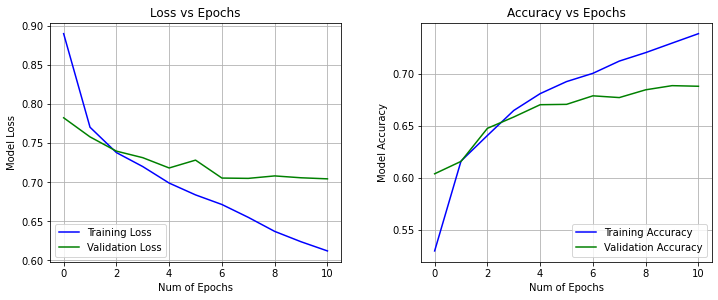

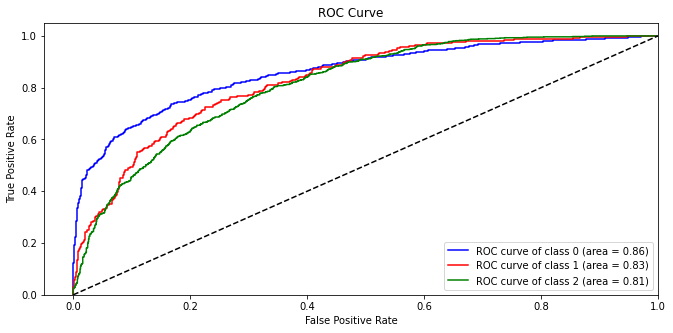


***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.90472,   Train F1 Score = 0.50996,   Validation Loss = 0.79820,   Validation F1 Score = 0.58835
Epoch   1:   Train Loss = 0.77338,   Train F1 Score = 0.61451,   Validation Loss = 0.75859,   Validation F1 Score = 0.62586
Epoch   2:   Train Loss = 0.74159,   Train F1 Score = 0.64641,   Validation Loss = 0.74411,   Validation F1 Score = 0.64109
Epoch   3:   Train Loss = 0.71928,   Train F1 Score = 0.6

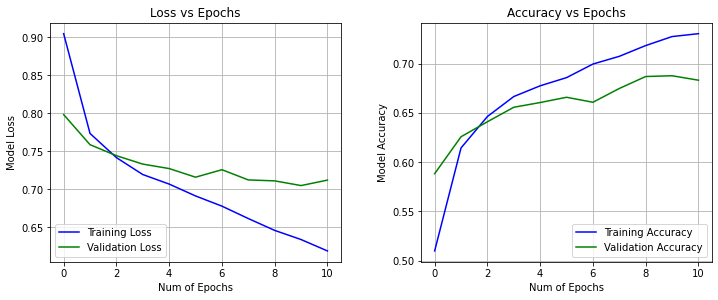

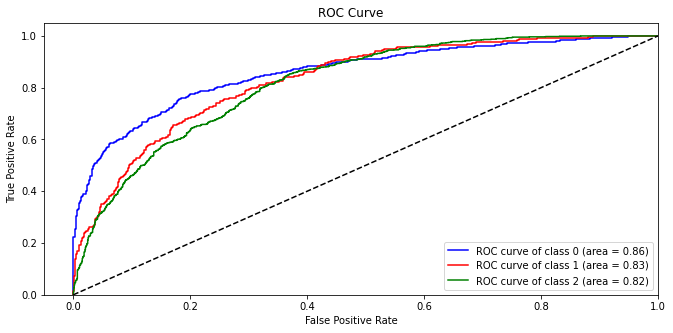


***************************************************************************************************************************
                                                     Grid Search: 3
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89550,   Train F1 Score = 0.53210,   Validation Loss = 0.79630,   Validation F1 Score = 0.59107
Epoch   1:   Train Loss = 0.76798,   Train F1 Score = 0.61772,   Validation Loss = 0.75716,   Validation F1 Score = 0.63264
Epoch   2:   Train Loss = 0.73661,   Train F1 Score = 0.64749,   Validation Loss = 0.74018,   Validation F1 Score = 0.64993
Epoch   3:   Train Loss = 0.71767,   Train F1 Score = 0.6

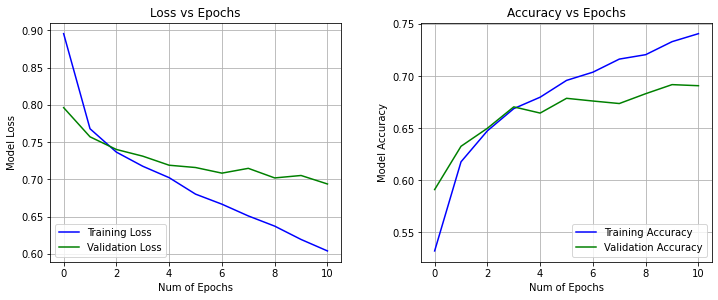

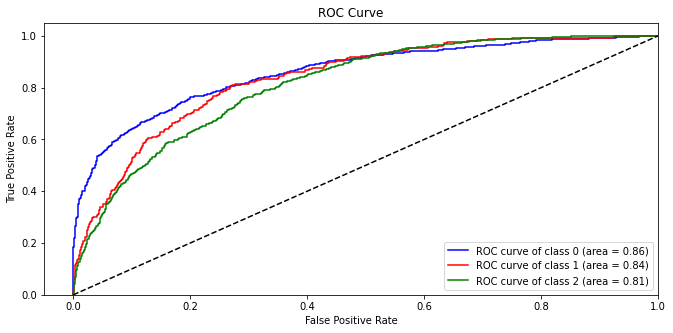


***************************************************************************************************************************
                                                     Grid Search: 4
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.90279,   Train F1 Score = 0.52408,   Validation Loss = 0.79519,   Validation F1 Score = 0.60721
Epoch   1:   Train Loss = 0.77095,   Train F1 Score = 0.61928,   Validation Loss = 0.76440,   Validation F1 Score = 0.62436
Epoch   2:   Train Loss = 0.74042,   Train F1 Score = 0.63936,   Validation Loss = 0.74639,   Validation F1 Score = 0.64391
Epoch   3:   Train Loss = 0.72053,   Train F1 Score = 0.6

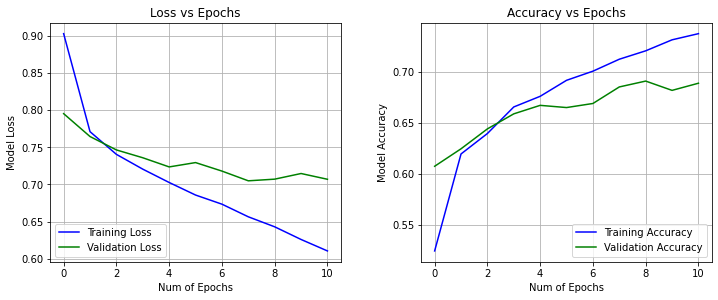

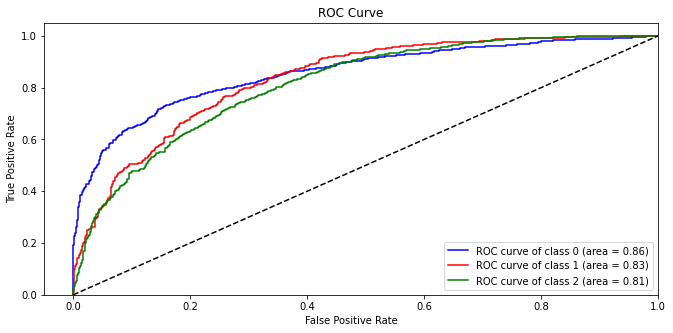


***************************************************************************************************************************
                                                     Grid Search: 5
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.88925,   Train F1 Score = 0.52852,   Validation Loss = 0.78584,   Validation F1 Score = 0.61039
Epoch   1:   Train Loss = 0.76212,   Train F1 Score = 0.62049,   Validation Loss = 0.75205,   Validation F1 Score = 0.62988
Epoch   2:   Train Loss = 0.73306,   Train F1 Score = 0.64786,   Validation Loss = 0.74471,   Validation F1 Score = 0.63848
Epoch   3:   Train Loss = 0.71393,   Train F1 Score = 0.

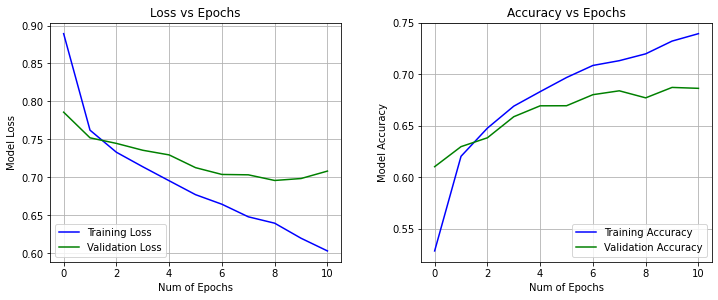

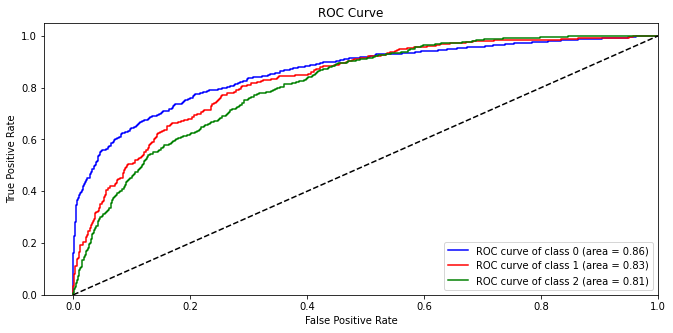


***************************************************************************************************************************
                                                     Grid Search: 6
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.90309,   Train F1 Score = 0.50821,   Validation Loss = 0.78993,   Validation F1 Score = 0.60294
Epoch   1:   Train Loss = 0.77087,   Train F1 Score = 0.61714,   Validation Loss = 0.75852,   Validation F1 Score = 0.62247
Epoch   2:   Train Loss = 0.74269,   Train F1 Score = 0.64405,   Validation Loss = 0.74597,   Validation F1 Score = 0.64963
Epoch   3:   Train Loss = 0.72489,   Train F1 Score = 0.

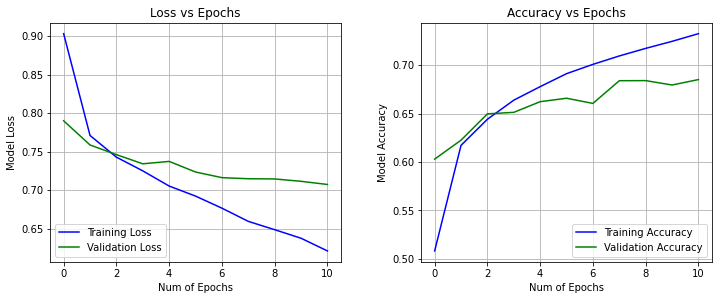

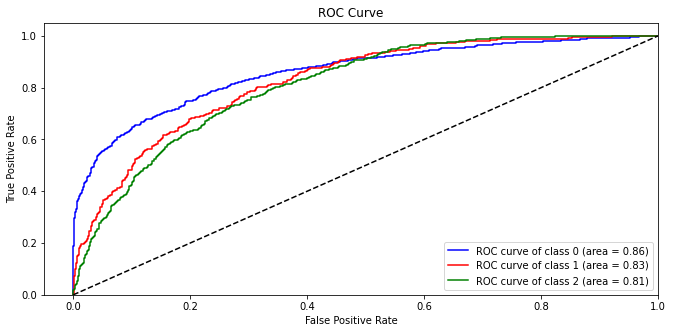


***************************************************************************************************************************
                                                     Grid Search: 7
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86224,   Train F1 Score = 0.55029,   Validation Loss = 0.78557,   Validation F1 Score = 0.61162
Epoch   1:   Train Loss = 0.75606,   Train F1 Score = 0.62671,   Validation Loss = 0.75439,   Validation F1 Score = 0.62790
Epoch   2:   Train Loss = 0.72631,   Train F1 Score = 0.65962,   Validation Loss = 0.73695,   Validation F1 Score = 0.64477
Epoch   3:   Train Loss = 0.70546,   Train F1 Score = 0.6

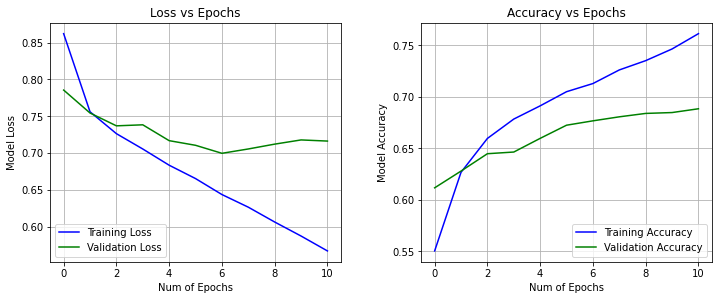

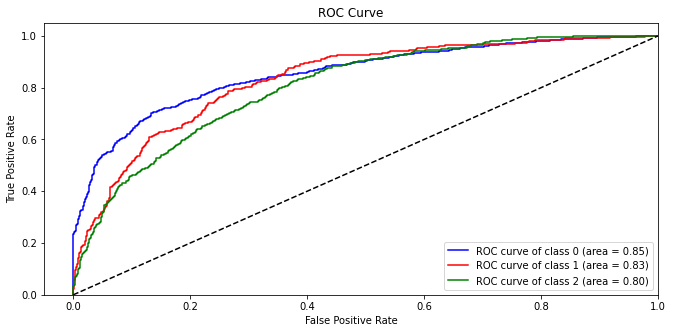


***************************************************************************************************************************
                                                     Grid Search: 8
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87393,   Train F1 Score = 0.52967,   Validation Loss = 0.78501,   Validation F1 Score = 0.60420
Epoch   1:   Train Loss = 0.75903,   Train F1 Score = 0.62939,   Validation Loss = 0.75454,   Validation F1 Score = 0.64704
Epoch   2:   Train Loss = 0.73002,   Train F1 Score = 0.65846,   Validation Loss = 0.73306,   Validation F1 Score = 0.65298
Epoch   3:   Train Loss = 0.70682,   Train F1 Score = 0.6

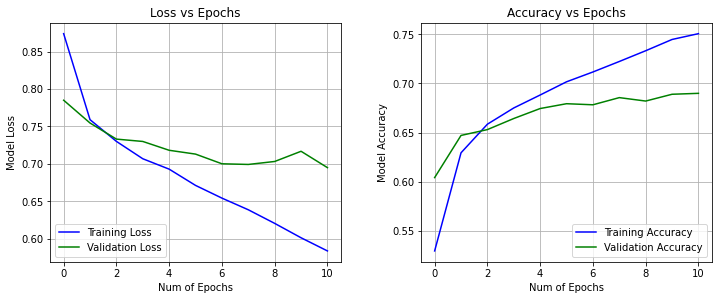

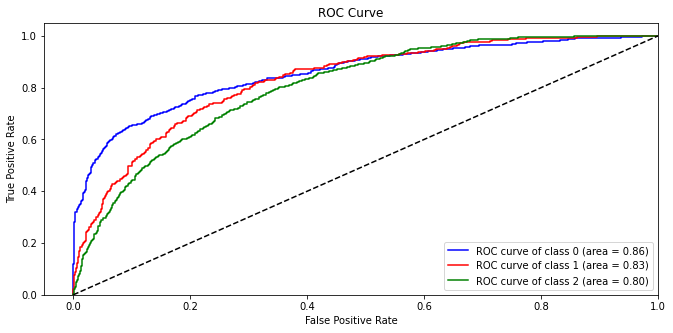


***************************************************************************************************************************
                                                     Grid Search: 9
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86854,   Train F1 Score = 0.54178,   Validation Loss = 0.76773,   Validation F1 Score = 0.60920
Epoch   1:   Train Loss = 0.75313,   Train F1 Score = 0.63426,   Validation Loss = 0.75150,   Validation F1 Score = 0.64496
Epoch   2:   Train Loss = 0.72555,   Train F1 Score = 0.66474,   Validation Loss = 0.73574,   Validation F1 Score = 0.65457
Epoch   3:   Train Loss = 0.70350,   Train F1 Score = 0.6

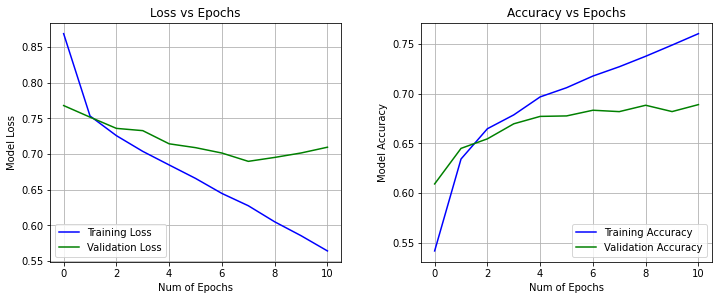

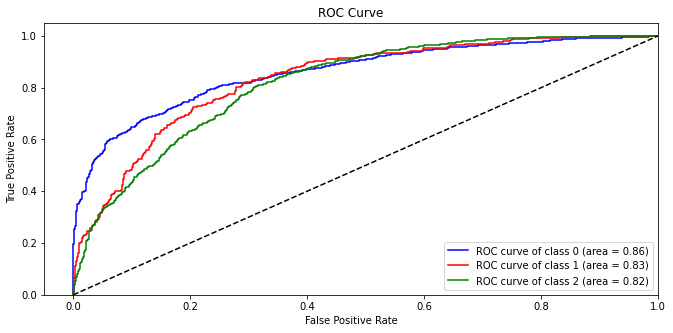


***************************************************************************************************************************
                                                     Grid Search: 10
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87682,   Train F1 Score = 0.52995,   Validation Loss = 0.78546,   Validation F1 Score = 0.60770
Epoch   1:   Train Loss = 0.75653,   Train F1 Score = 0.63182,   Validation Loss = 0.77186,   Validation F1 Score = 0.64452
Epoch   2:   Train Loss = 0.72953,   Train F1 Score = 0.66269,   Validation Loss = 0.74273,   Validation F1 Score = 0.66305
Epoch   3:   Train Loss = 0.70712,   Train F1 Score = 0.

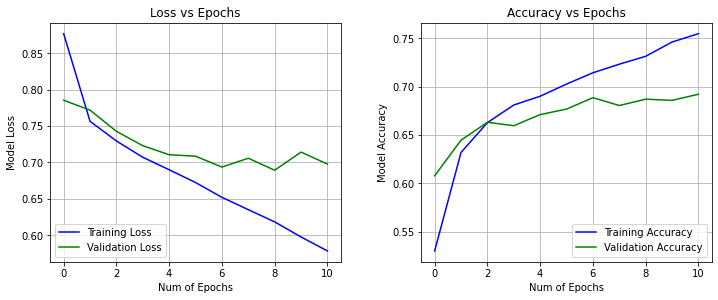

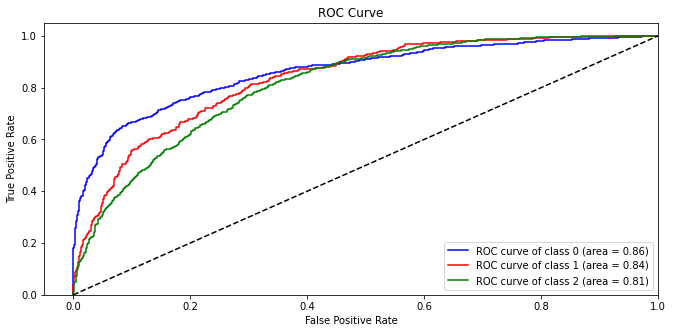


***************************************************************************************************************************
                                                     Grid Search: 11
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87403,   Train F1 Score = 0.53897,   Validation Loss = 0.77373,   Validation F1 Score = 0.62175
Epoch   1:   Train Loss = 0.75333,   Train F1 Score = 0.63529,   Validation Loss = 0.74627,   Validation F1 Score = 0.63775
Epoch   2:   Train Loss = 0.72733,   Train F1 Score = 0.66150,   Validation Loss = 0.72995,   Validation F1 Score = 0.65602
Epoch   3:   Train Loss = 0.70108,   Train F1 Score = 0

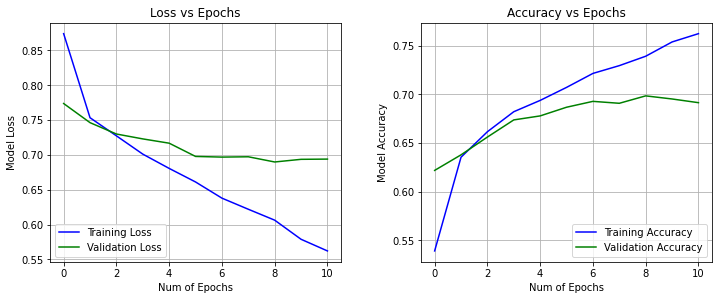

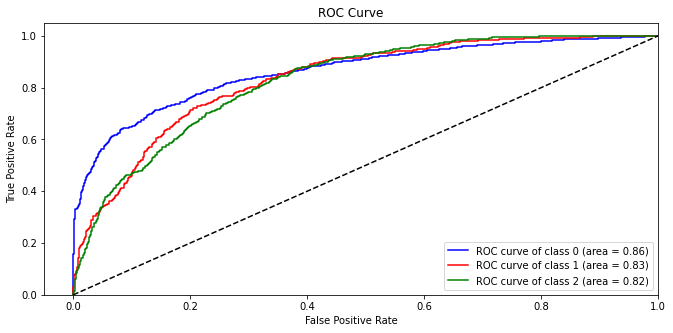


***************************************************************************************************************************
                                                     Grid Search: 12
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87036,   Train F1 Score = 0.53904,   Validation Loss = 0.78816,   Validation F1 Score = 0.61465
Epoch   1:   Train Loss = 0.75583,   Train F1 Score = 0.63134,   Validation Loss = 0.74997,   Validation F1 Score = 0.64996
Epoch   2:   Train Loss = 0.72560,   Train F1 Score = 0.66097,   Validation Loss = 0.74443,   Validation F1 Score = 0.63891
Epoch   3:   Train Loss = 0.70469,   Train F1 Score = 0

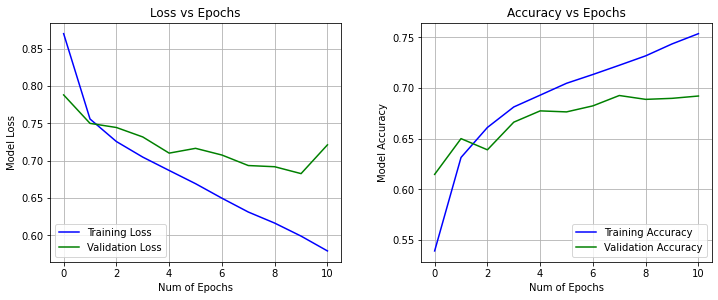

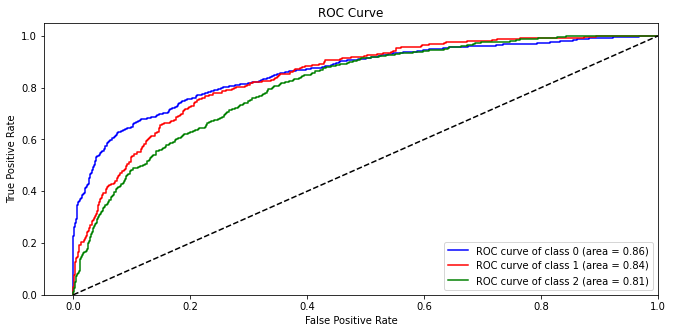


***************************************************************************************************************************
                                                     Grid Search: 13
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89275,   Train F1 Score = 0.50529,   Validation Loss = 0.79510,   Validation F1 Score = 0.60219
Epoch   1:   Train Loss = 0.76507,   Train F1 Score = 0.62115,   Validation Loss = 0.75187,   Validation F1 Score = 0.63616
Epoch   2:   Train Loss = 0.73301,   Train F1 Score = 0.64824,   Validation Loss = 0.73272,   Validation F1 Score = 0.65552
Epoch   3:   Train Loss = 0.71190,   Train F1 Score = 0.

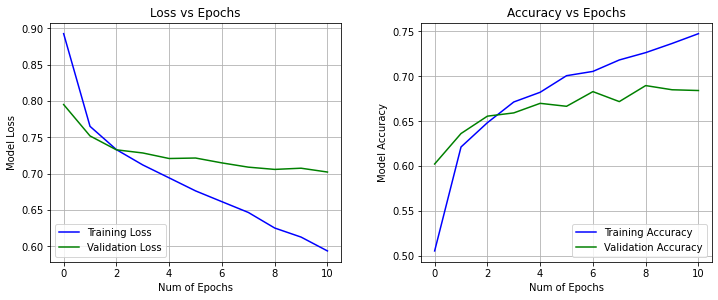

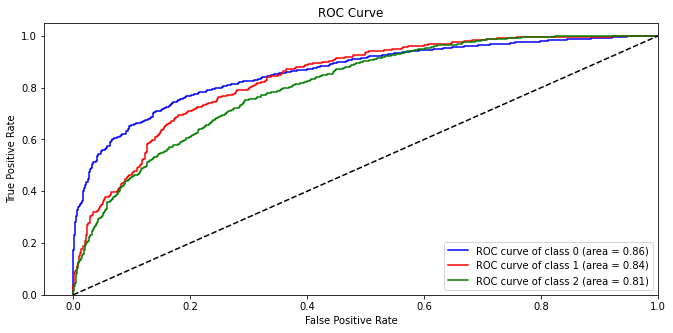


***************************************************************************************************************************
                                                     Grid Search: 14
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89949,   Train F1 Score = 0.49875,   Validation Loss = 0.80724,   Validation F1 Score = 0.60127
Epoch   1:   Train Loss = 0.77837,   Train F1 Score = 0.61550,   Validation Loss = 0.76182,   Validation F1 Score = 0.60895
Epoch   2:   Train Loss = 0.74258,   Train F1 Score = 0.64277,   Validation Loss = 0.74580,   Validation F1 Score = 0.63165
Epoch   3:   Train Loss = 0.72398,   Train F1 Score = 0.

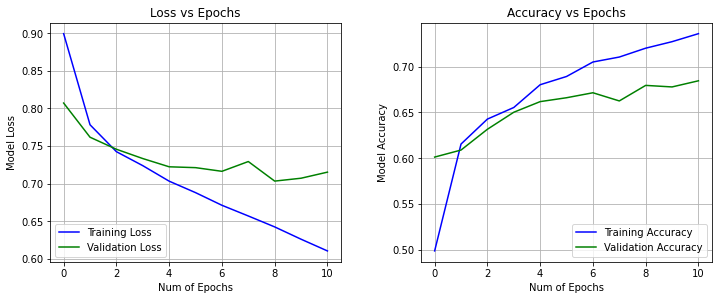

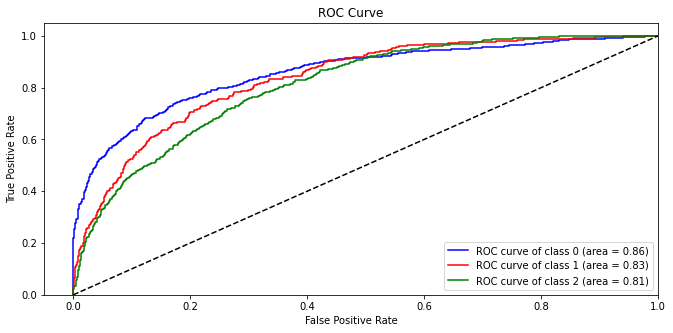


***************************************************************************************************************************
                                                     Grid Search: 15
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89958,   Train F1 Score = 0.51387,   Validation Loss = 0.79918,   Validation F1 Score = 0.60120
Epoch   1:   Train Loss = 0.77014,   Train F1 Score = 0.61800,   Validation Loss = 0.75043,   Validation F1 Score = 0.63925
Epoch   2:   Train Loss = 0.73213,   Train F1 Score = 0.65622,   Validation Loss = 0.73080,   Validation F1 Score = 0.65882
Epoch   3:   Train Loss = 0.70981,   Train F1 Score = 0.

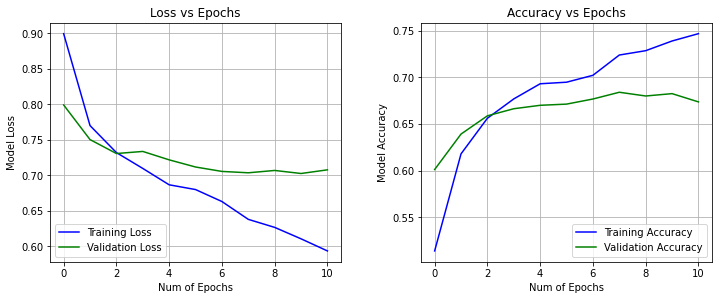

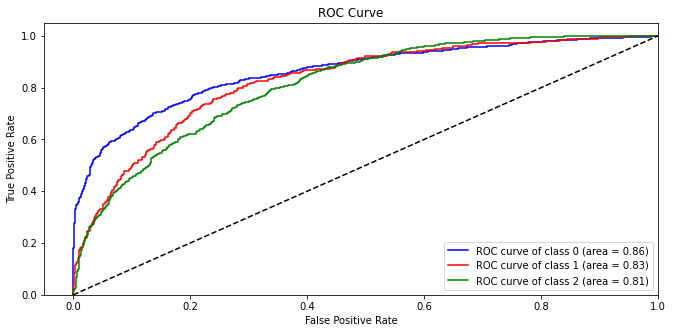


***************************************************************************************************************************
                                                     Grid Search: 16
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89813,   Train F1 Score = 0.50991,   Validation Loss = 0.79800,   Validation F1 Score = 0.60417
Epoch   1:   Train Loss = 0.77394,   Train F1 Score = 0.61811,   Validation Loss = 0.76297,   Validation F1 Score = 0.63624
Epoch   2:   Train Loss = 0.74281,   Train F1 Score = 0.64359,   Validation Loss = 0.74002,   Validation F1 Score = 0.65336
Epoch   3:   Train Loss = 0.72280,   Train F1 Score = 0.

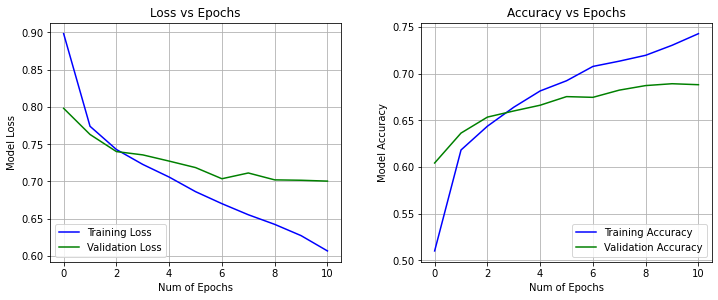

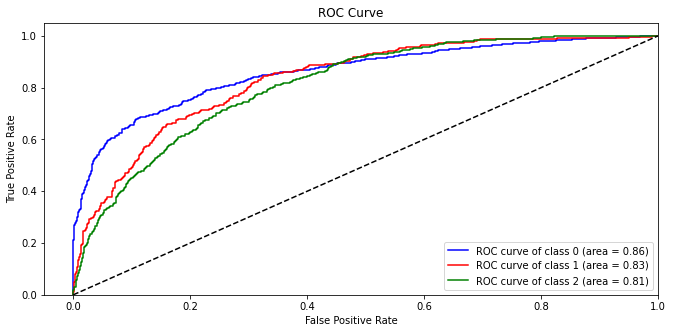


***************************************************************************************************************************
                                                     Grid Search: 17
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89981,   Train F1 Score = 0.51592,   Validation Loss = 0.78523,   Validation F1 Score = 0.61166
Epoch   1:   Train Loss = 0.76677,   Train F1 Score = 0.61794,   Validation Loss = 0.75649,   Validation F1 Score = 0.63479
Epoch   2:   Train Loss = 0.73201,   Train F1 Score = 0.65989,   Validation Loss = 0.74780,   Validation F1 Score = 0.63805
Epoch   3:   Train Loss = 0.71234,   Train F1 Score = 0

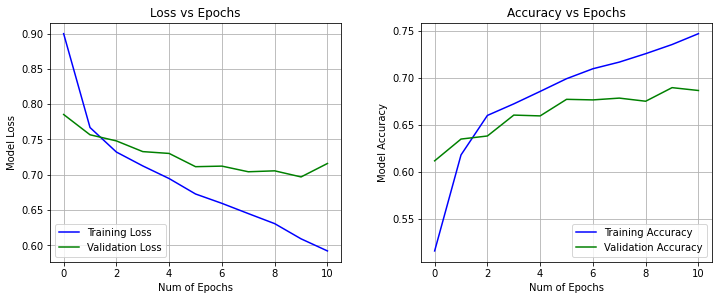

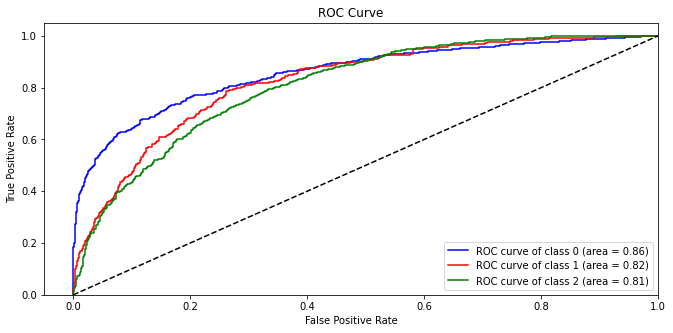


***************************************************************************************************************************
                                                     Grid Search: 18
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.91258,   Train F1 Score = 0.50582,   Validation Loss = 0.80228,   Validation F1 Score = 0.59606
Epoch   1:   Train Loss = 0.77243,   Train F1 Score = 0.62059,   Validation Loss = 0.75618,   Validation F1 Score = 0.63058
Epoch   2:   Train Loss = 0.74121,   Train F1 Score = 0.64249,   Validation Loss = 0.74364,   Validation F1 Score = 0.64761
Epoch   3:   Train Loss = 0.72084,   Train F1 Score = 0

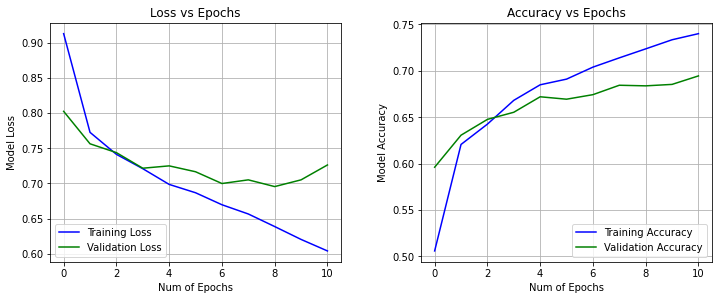

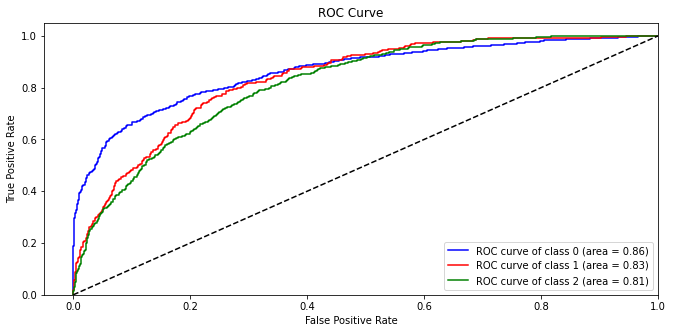


***************************************************************************************************************************
                                                     Grid Search: 19
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86938,   Train F1 Score = 0.53370,   Validation Loss = 0.78709,   Validation F1 Score = 0.61184
Epoch   1:   Train Loss = 0.75169,   Train F1 Score = 0.63914,   Validation Loss = 0.76165,   Validation F1 Score = 0.63950
Epoch   2:   Train Loss = 0.72249,   Train F1 Score = 0.66718,   Validation Loss = 0.72635,   Validation F1 Score = 0.66184
Epoch   3:   Train Loss = 0.70196,   Train F1 Score = 0.

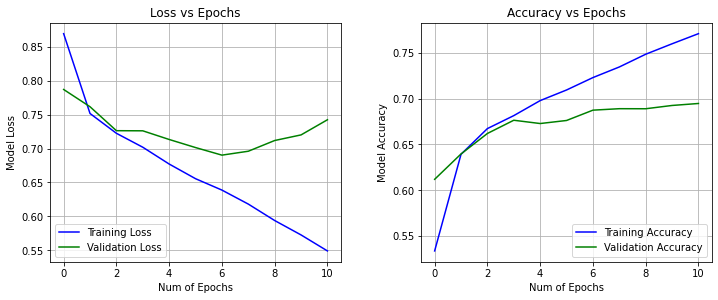

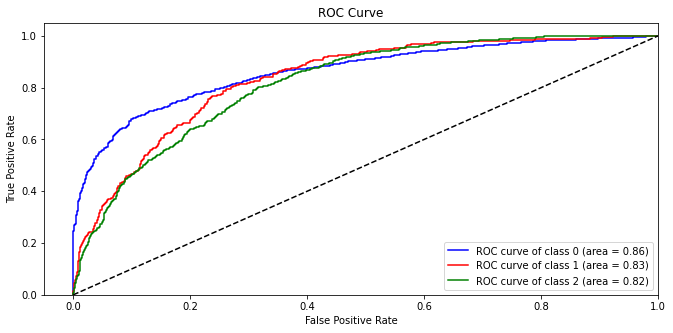


***************************************************************************************************************************
                                                     Grid Search: 20
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87293,   Train F1 Score = 0.54104,   Validation Loss = 0.78713,   Validation F1 Score = 0.60572
Epoch   1:   Train Loss = 0.75599,   Train F1 Score = 0.63487,   Validation Loss = 0.74710,   Validation F1 Score = 0.63723
Epoch   2:   Train Loss = 0.72373,   Train F1 Score = 0.66515,   Validation Loss = 0.72983,   Validation F1 Score = 0.66561
Epoch   3:   Train Loss = 0.70634,   Train F1 Score = 0.

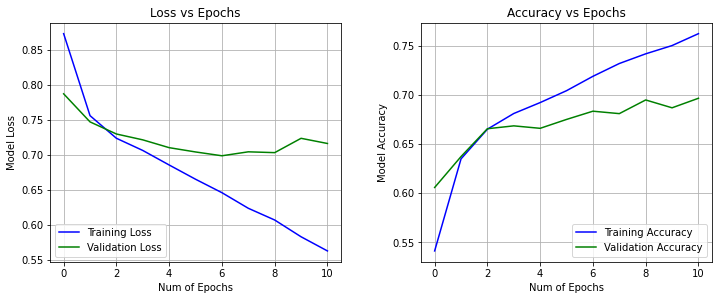

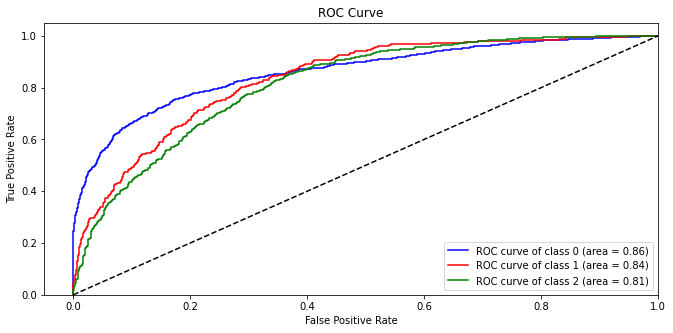


***************************************************************************************************************************
                                                     Grid Search: 21
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86813,   Train F1 Score = 0.53643,   Validation Loss = 0.77949,   Validation F1 Score = 0.60560
Epoch   1:   Train Loss = 0.75223,   Train F1 Score = 0.63483,   Validation Loss = 0.75403,   Validation F1 Score = 0.63387
Epoch   2:   Train Loss = 0.72252,   Train F1 Score = 0.66899,   Validation Loss = 0.73943,   Validation F1 Score = 0.66240
Epoch   3:   Train Loss = 0.69937,   Train F1 Score = 0.

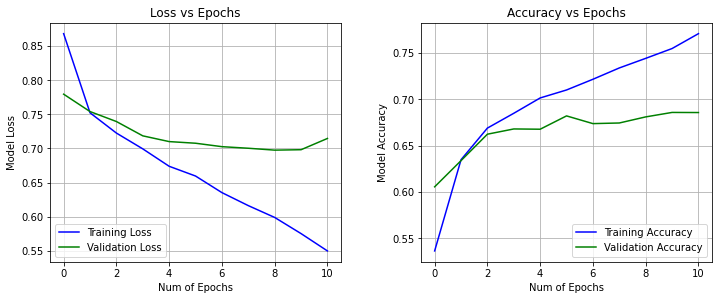

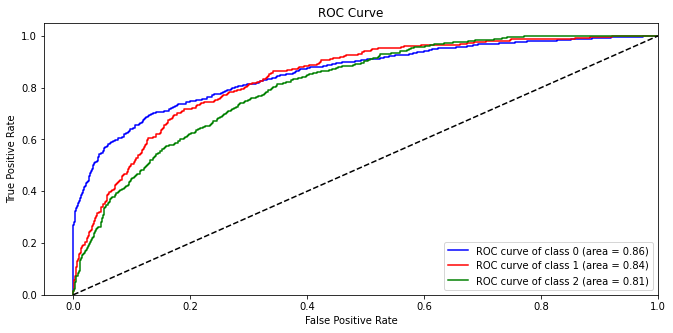


***************************************************************************************************************************
                                                     Grid Search: 22
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86690,   Train F1 Score = 0.54104,   Validation Loss = 0.77187,   Validation F1 Score = 0.61192
Epoch   1:   Train Loss = 0.75560,   Train F1 Score = 0.63817,   Validation Loss = 0.74247,   Validation F1 Score = 0.64132
Epoch   2:   Train Loss = 0.72367,   Train F1 Score = 0.66662,   Validation Loss = 0.73509,   Validation F1 Score = 0.66393
Epoch   3:   Train Loss = 0.70261,   Train F1 Score = 0.

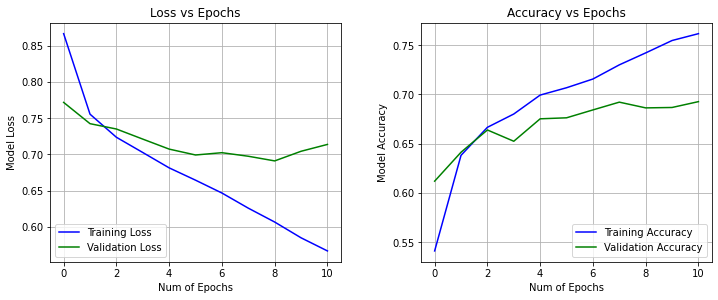

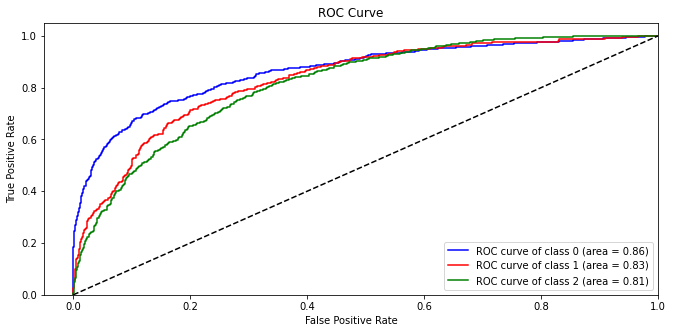


***************************************************************************************************************************
                                                     Grid Search: 23
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86376,   Train F1 Score = 0.53879,   Validation Loss = 0.77728,   Validation F1 Score = 0.61774
Epoch   1:   Train Loss = 0.75180,   Train F1 Score = 0.63700,   Validation Loss = 0.74809,   Validation F1 Score = 0.62666
Epoch   2:   Train Loss = 0.72510,   Train F1 Score = 0.66386,   Validation Loss = 0.72980,   Validation F1 Score = 0.66416
Epoch   3:   Train Loss = 0.69754,   Train F1 Score = 0

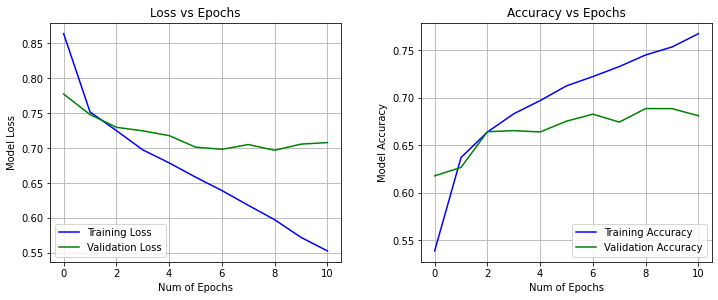

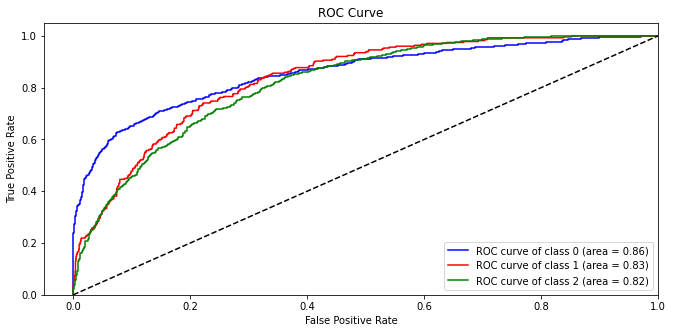


***************************************************************************************************************************
                                                     Grid Search: 24
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86652,   Train F1 Score = 0.54518,   Validation Loss = 0.77887,   Validation F1 Score = 0.60975
Epoch   1:   Train Loss = 0.75880,   Train F1 Score = 0.63180,   Validation Loss = 0.75348,   Validation F1 Score = 0.62983
Epoch   2:   Train Loss = 0.72707,   Train F1 Score = 0.66178,   Validation Loss = 0.75761,   Validation F1 Score = 0.64028
Epoch   3:   Train Loss = 0.70955,   Train F1 Score = 0

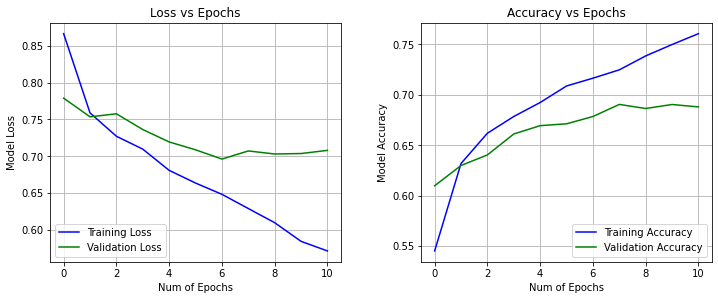

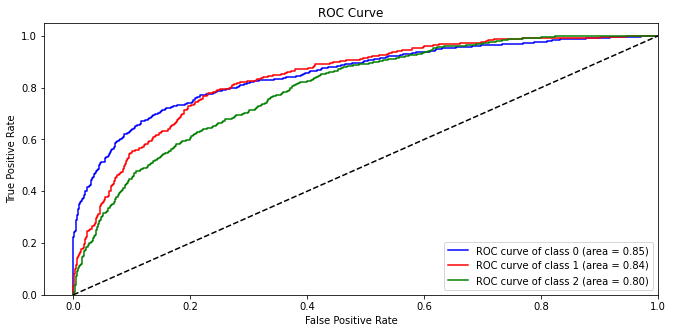


***************************************************************************************************************************
                                                     Grid Search: 25
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.91068,   Train F1 Score = 0.48061,   Validation Loss = 0.81564,   Validation F1 Score = 0.59914
Epoch   1:   Train Loss = 0.78046,   Train F1 Score = 0.61818,   Validation Loss = 0.76127,   Validation F1 Score = 0.61010
Epoch   2:   Train Loss = 0.73568,   Train F1 Score = 0.64317,   Validation Loss = 0.73874,   Validation F1 Score = 0.64462
Epoch   3:   Train Loss = 0.71206,   Train F1 Score = 0.

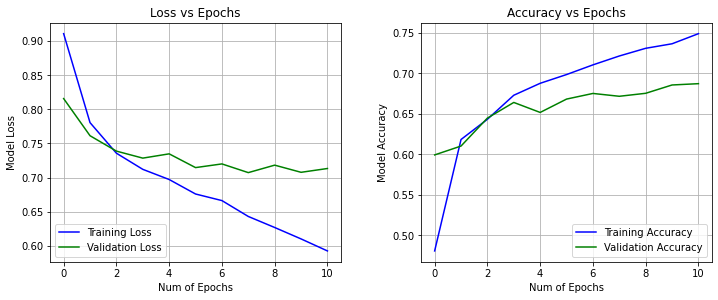

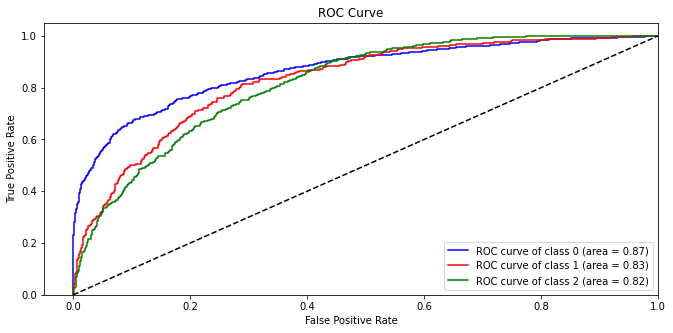


***************************************************************************************************************************
                                                     Grid Search: 26
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.92518,   Train F1 Score = 0.47736,   Validation Loss = 0.81507,   Validation F1 Score = 0.59397
Epoch   1:   Train Loss = 0.78769,   Train F1 Score = 0.61256,   Validation Loss = 0.76820,   Validation F1 Score = 0.62121
Epoch   2:   Train Loss = 0.74820,   Train F1 Score = 0.64261,   Validation Loss = 0.75188,   Validation F1 Score = 0.65401
Epoch   3:   Train Loss = 0.72523,   Train F1 Score = 0.

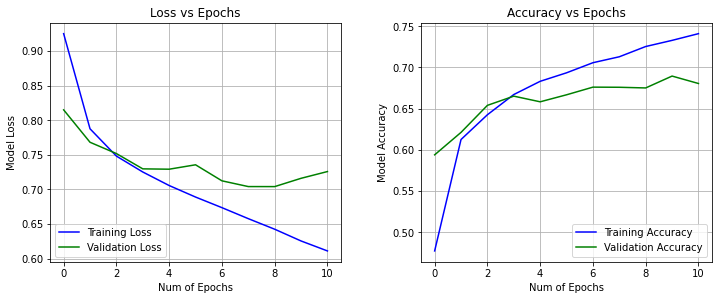

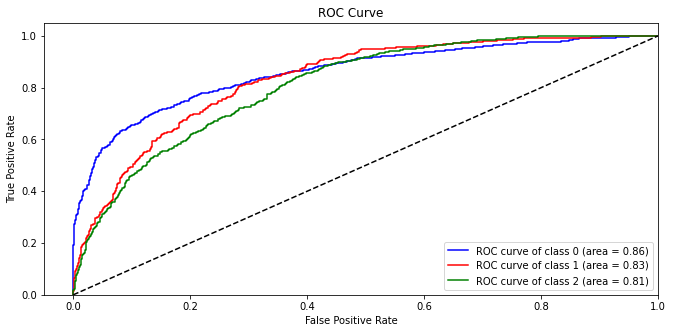


***************************************************************************************************************************
                                                     Grid Search: 27
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.91540,   Train F1 Score = 0.47954,   Validation Loss = 0.80569,   Validation F1 Score = 0.60180
Epoch   1:   Train Loss = 0.77674,   Train F1 Score = 0.61477,   Validation Loss = 0.76093,   Validation F1 Score = 0.62207
Epoch   2:   Train Loss = 0.73971,   Train F1 Score = 0.64167,   Validation Loss = 0.74036,   Validation F1 Score = 0.63369
Epoch   3:   Train Loss = 0.71229,   Train F1 Score = 0.

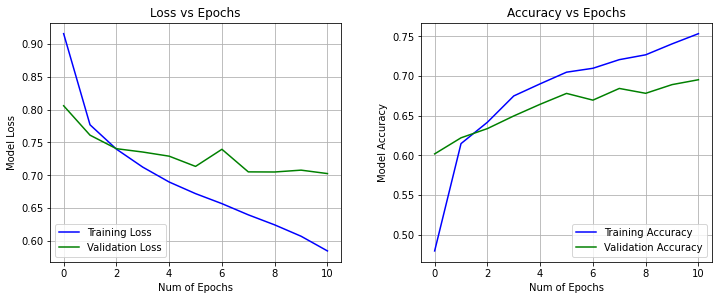

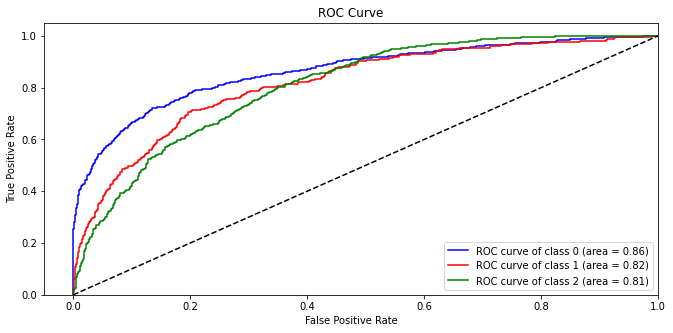


***************************************************************************************************************************
                                                     Grid Search: 28
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.93536,   Train F1 Score = 0.47297,   Validation Loss = 0.82696,   Validation F1 Score = 0.59422
Epoch   1:   Train Loss = 0.78684,   Train F1 Score = 0.61543,   Validation Loss = 0.76317,   Validation F1 Score = 0.61571
Epoch   2:   Train Loss = 0.74689,   Train F1 Score = 0.64442,   Validation Loss = 0.74783,   Validation F1 Score = 0.64684
Epoch   3:   Train Loss = 0.71944,   Train F1 Score = 0.

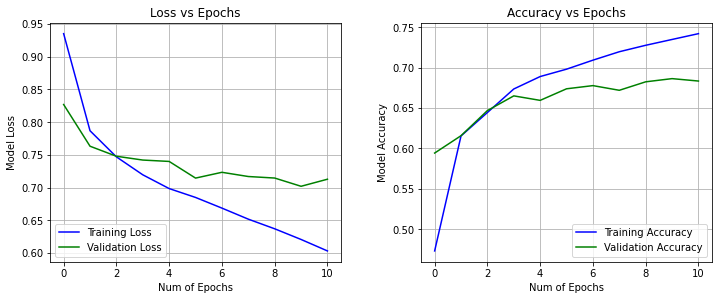

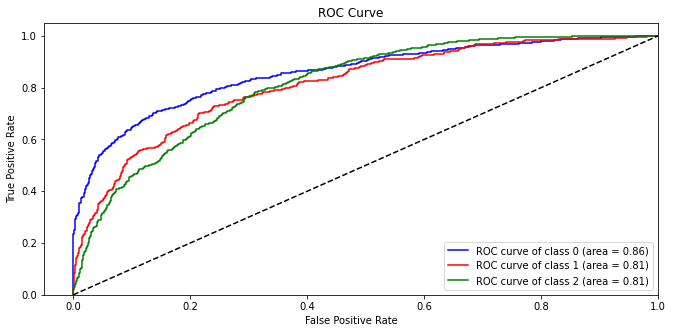


***************************************************************************************************************************
                                                     Grid Search: 29
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.92844,   Train F1 Score = 0.47369,   Validation Loss = 0.83012,   Validation F1 Score = 0.59214
Epoch   1:   Train Loss = 0.78300,   Train F1 Score = 0.61623,   Validation Loss = 0.76576,   Validation F1 Score = 0.63427
Epoch   2:   Train Loss = 0.74216,   Train F1 Score = 0.65369,   Validation Loss = 0.75331,   Validation F1 Score = 0.65241
Epoch   3:   Train Loss = 0.71496,   Train F1 Score = 0

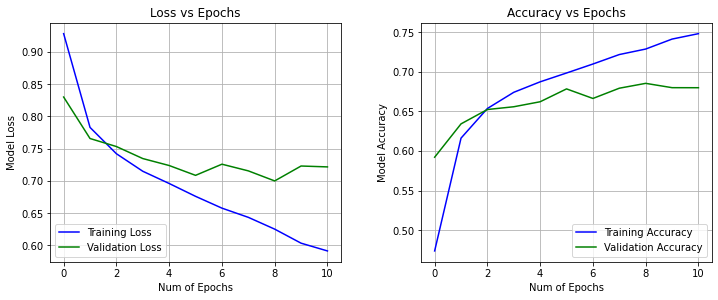

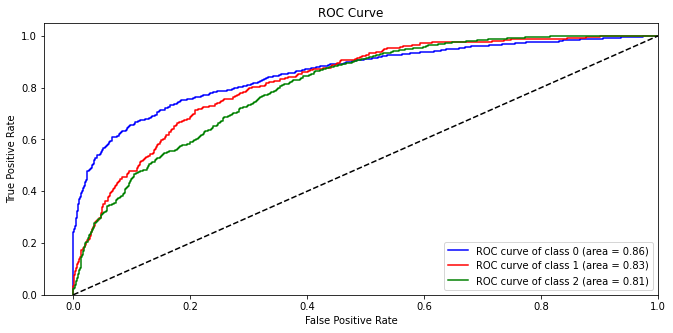


***************************************************************************************************************************
                                                     Grid Search: 30
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.92142,   Train F1 Score = 0.49564,   Validation Loss = 0.81175,   Validation F1 Score = 0.60131
Epoch   1:   Train Loss = 0.78867,   Train F1 Score = 0.61480,   Validation Loss = 0.76815,   Validation F1 Score = 0.62284
Epoch   2:   Train Loss = 0.74983,   Train F1 Score = 0.63970,   Validation Loss = 0.75116,   Validation F1 Score = 0.65357
Epoch   3:   Train Loss = 0.72727,   Train F1 Score = 0

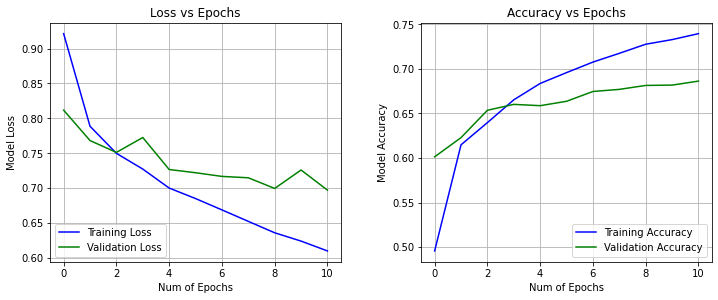

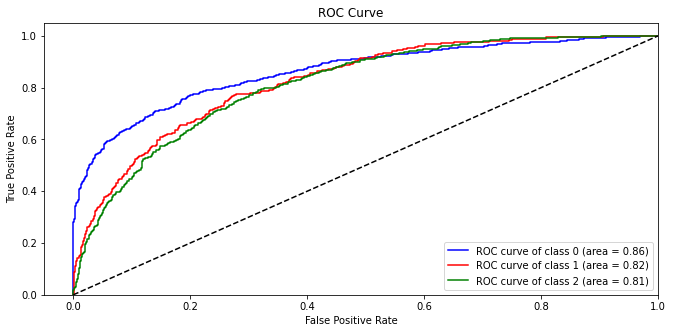


***************************************************************************************************************************
                                                     Grid Search: 31
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89780,   Train F1 Score = 0.49807,   Validation Loss = 0.81753,   Validation F1 Score = 0.58916
Epoch   1:   Train Loss = 0.77752,   Train F1 Score = 0.61645,   Validation Loss = 0.75307,   Validation F1 Score = 0.63319
Epoch   2:   Train Loss = 0.73219,   Train F1 Score = 0.65132,   Validation Loss = 0.74056,   Validation F1 Score = 0.64476
Epoch   3:   Train Loss = 0.70442,   Train F1 Score = 0.

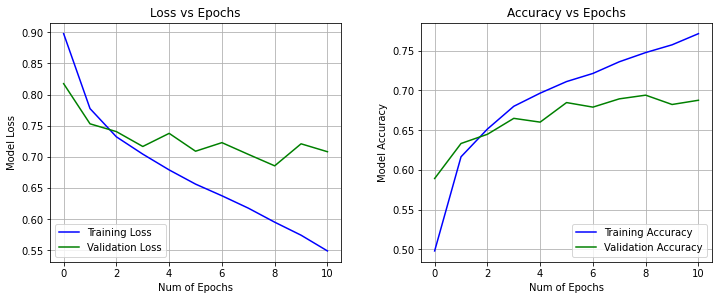

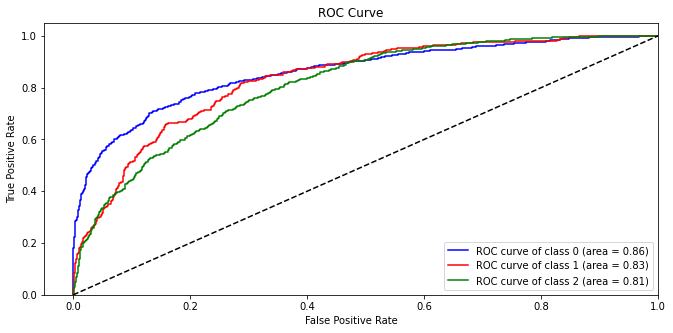


***************************************************************************************************************************
                                                     Grid Search: 32
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.91037,   Train F1 Score = 0.49060,   Validation Loss = 0.80724,   Validation F1 Score = 0.58589
Epoch   1:   Train Loss = 0.77398,   Train F1 Score = 0.63008,   Validation Loss = 0.75244,   Validation F1 Score = 0.63635
Epoch   2:   Train Loss = 0.72843,   Train F1 Score = 0.66384,   Validation Loss = 0.73747,   Validation F1 Score = 0.65690
Epoch   3:   Train Loss = 0.70676,   Train F1 Score = 0.

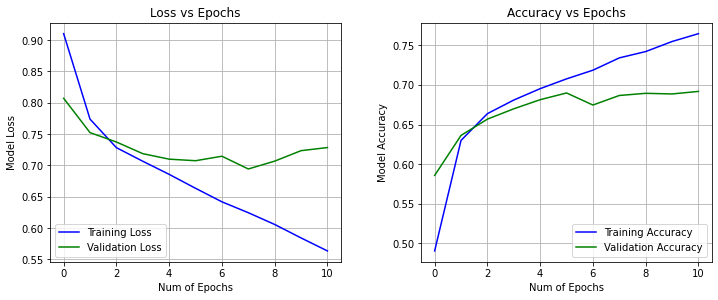

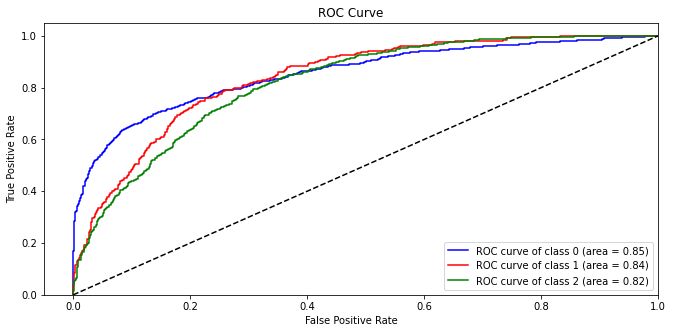


***************************************************************************************************************************
                                                     Grid Search: 33
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89363,   Train F1 Score = 0.50611,   Validation Loss = 0.82626,   Validation F1 Score = 0.60580
Epoch   1:   Train Loss = 0.77521,   Train F1 Score = 0.62345,   Validation Loss = 0.75376,   Validation F1 Score = 0.62752
Epoch   2:   Train Loss = 0.73288,   Train F1 Score = 0.65509,   Validation Loss = 0.74585,   Validation F1 Score = 0.64787
Epoch   3:   Train Loss = 0.70409,   Train F1 Score = 0.

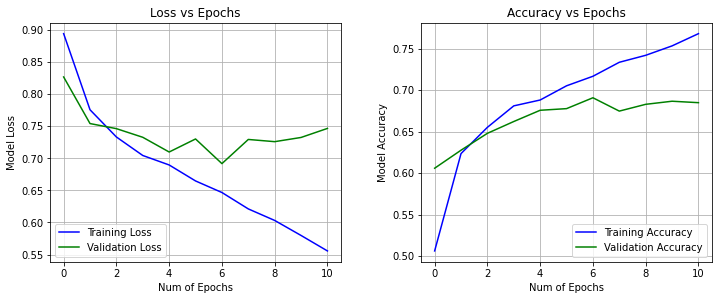

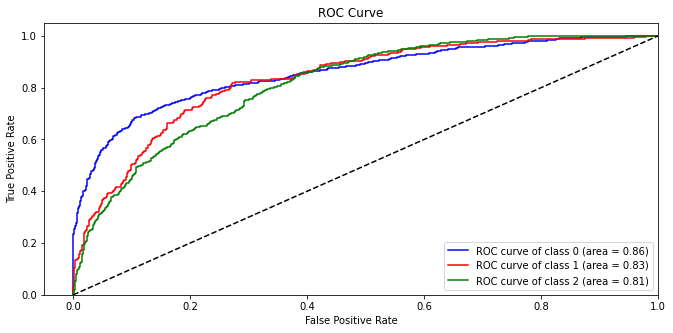


***************************************************************************************************************************
                                                     Grid Search: 34
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.90801,   Train F1 Score = 0.49085,   Validation Loss = 0.80611,   Validation F1 Score = 0.60855
Epoch   1:   Train Loss = 0.76630,   Train F1 Score = 0.62651,   Validation Loss = 0.75215,   Validation F1 Score = 0.65131
Epoch   2:   Train Loss = 0.72733,   Train F1 Score = 0.66622,   Validation Loss = 0.73426,   Validation F1 Score = 0.65426
Epoch   3:   Train Loss = 0.70705,   Train F1 Score = 0.

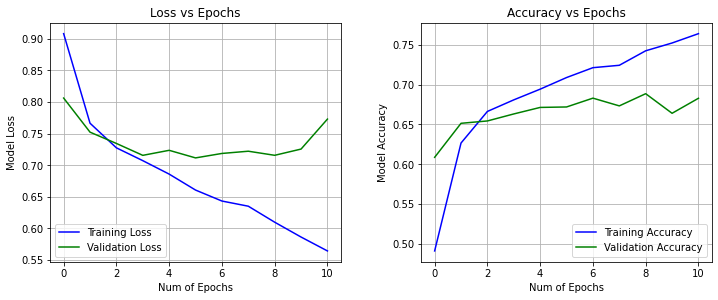

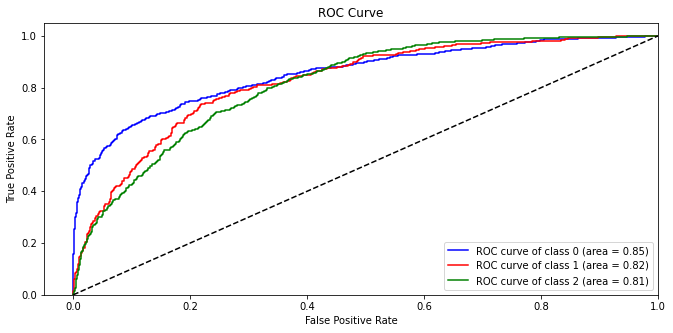


***************************************************************************************************************************
                                                     Grid Search: 35
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89386,   Train F1 Score = 0.50841,   Validation Loss = 0.79413,   Validation F1 Score = 0.60561
Epoch   1:   Train Loss = 0.76280,   Train F1 Score = 0.62853,   Validation Loss = 0.75069,   Validation F1 Score = 0.65499
Epoch   2:   Train Loss = 0.72579,   Train F1 Score = 0.66500,   Validation Loss = 0.73471,   Validation F1 Score = 0.66684
Epoch   3:   Train Loss = 0.70025,   Train F1 Score = 0

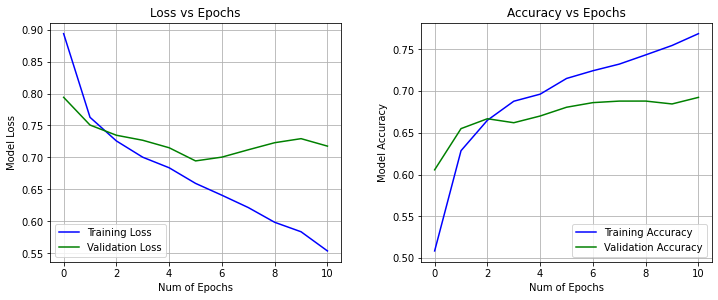

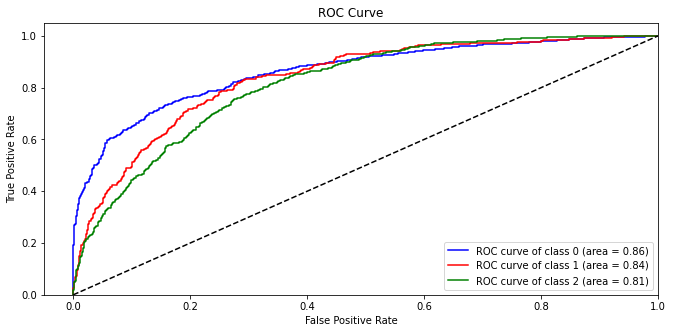


***************************************************************************************************************************
                                                     Grid Search: 36
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.90129,   Train F1 Score = 0.50090,   Validation Loss = 0.82203,   Validation F1 Score = 0.59965
Epoch   1:   Train Loss = 0.77216,   Train F1 Score = 0.62538,   Validation Loss = 0.75303,   Validation F1 Score = 0.63150
Epoch   2:   Train Loss = 0.73183,   Train F1 Score = 0.65732,   Validation Loss = 0.74295,   Validation F1 Score = 0.65493
Epoch   3:   Train Loss = 0.70775,   Train F1 Score = 0

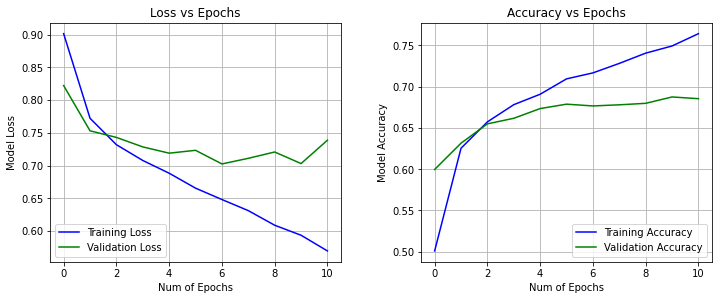

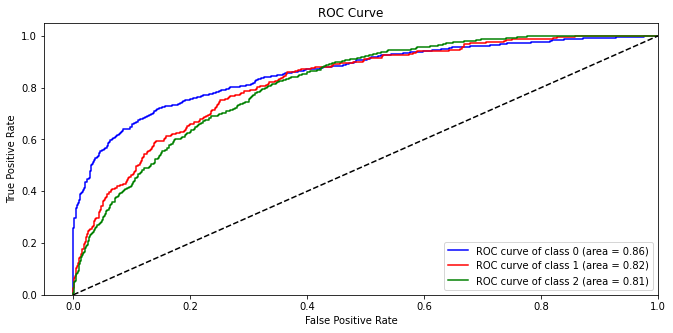


***************************************************************************************************************************
                                                     Grid Search: 37
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86820,   Train F1 Score = 0.55156,   Validation Loss = 0.77953,   Validation F1 Score = 0.61929
Epoch   1:   Train Loss = 0.75803,   Train F1 Score = 0.63733,   Validation Loss = 0.75592,   Validation F1 Score = 0.64760
Epoch   2:   Train Loss = 0.72561,   Train F1 Score = 0.66169,   Validation Loss = 0.74032,   Validation F1 Score = 0.65823
Epoch   3:   Train Loss = 0.70890,   Train F1 Score = 0.6

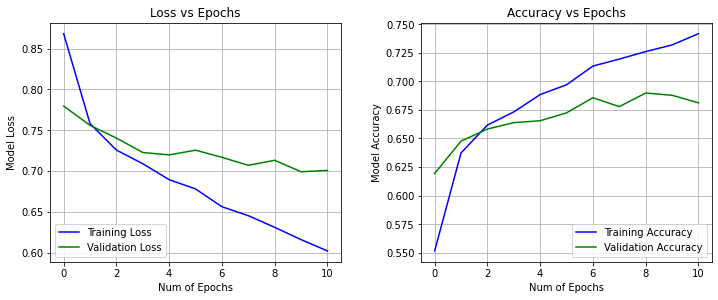

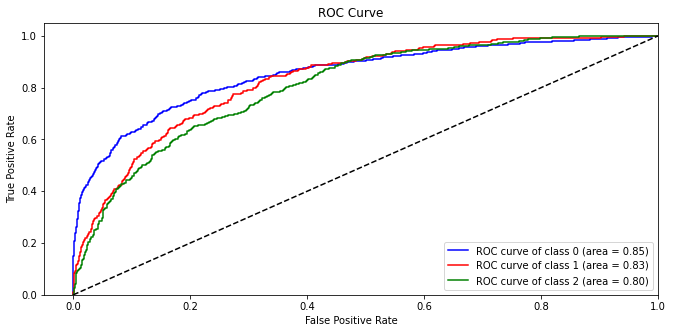


***************************************************************************************************************************
                                                     Grid Search: 38
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.89265,   Train F1 Score = 0.53417,   Validation Loss = 0.79042,   Validation F1 Score = 0.60652
Epoch   1:   Train Loss = 0.76644,   Train F1 Score = 0.62901,   Validation Loss = 0.76380,   Validation F1 Score = 0.63626
Epoch   2:   Train Loss = 0.73730,   Train F1 Score = 0.65997,   Validation Loss = 0.74136,   Validation F1 Score = 0.65402
Epoch   3:   Train Loss = 0.71828,   Train F1 Score = 0.6

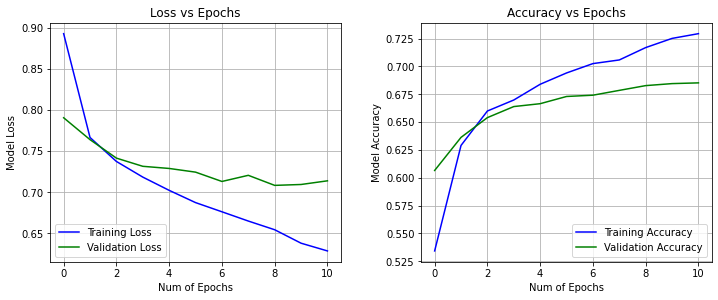

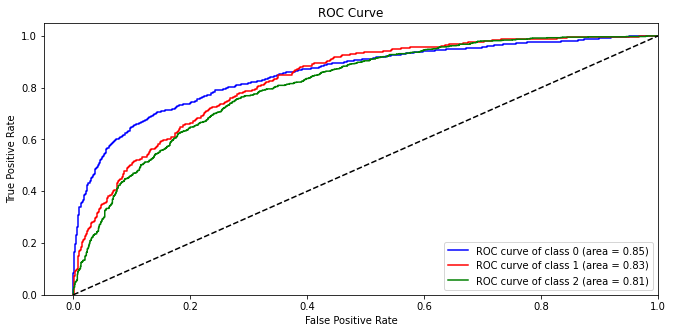


***************************************************************************************************************************
                                                     Grid Search: 39
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87724,   Train F1 Score = 0.53490,   Validation Loss = 0.77828,   Validation F1 Score = 0.62867
Epoch   1:   Train Loss = 0.75843,   Train F1 Score = 0.63304,   Validation Loss = 0.74763,   Validation F1 Score = 0.64354
Epoch   2:   Train Loss = 0.72955,   Train F1 Score = 0.66218,   Validation Loss = 0.73440,   Validation F1 Score = 0.65916
Epoch   3:   Train Loss = 0.70724,   Train F1 Score = 0.6

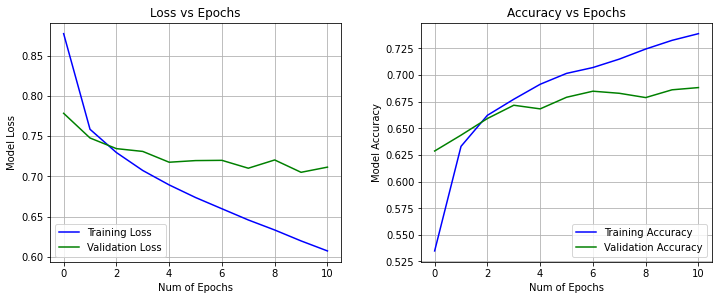

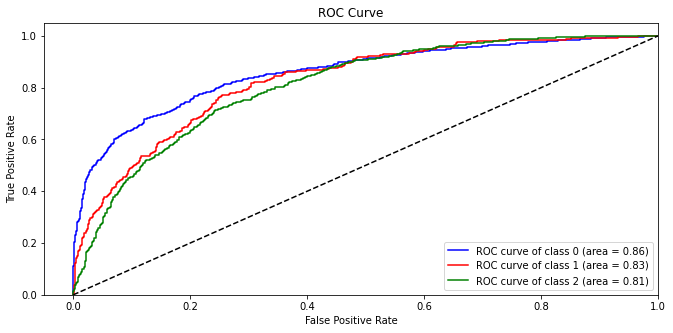


***************************************************************************************************************************
                                                     Grid Search: 40
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.88676,   Train F1 Score = 0.53856,   Validation Loss = 0.79113,   Validation F1 Score = 0.60551
Epoch   1:   Train Loss = 0.77114,   Train F1 Score = 0.62673,   Validation Loss = 0.75668,   Validation F1 Score = 0.62398
Epoch   2:   Train Loss = 0.73931,   Train F1 Score = 0.65300,   Validation Loss = 0.73944,   Validation F1 Score = 0.64697
Epoch   3:   Train Loss = 0.72067,   Train F1 Score = 0.6

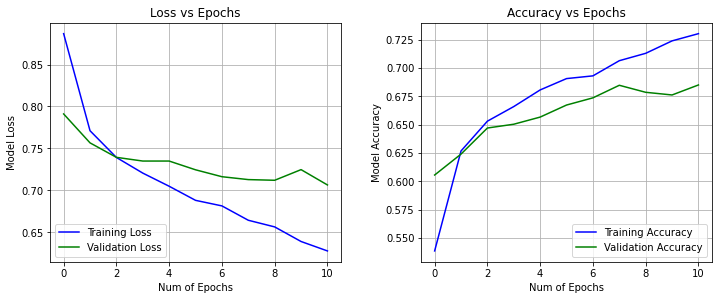

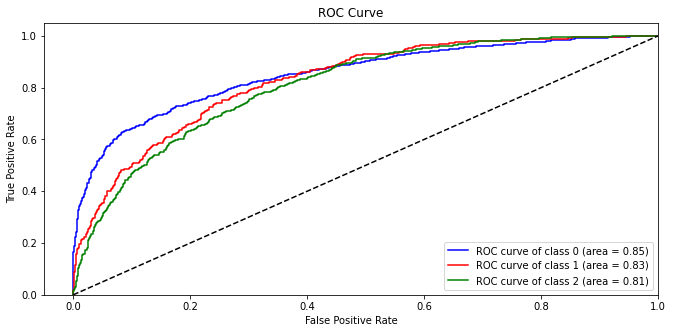


***************************************************************************************************************************
                                                     Grid Search: 41
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87019,   Train F1 Score = 0.54163,   Validation Loss = 0.78804,   Validation F1 Score = 0.60936
Epoch   1:   Train Loss = 0.75780,   Train F1 Score = 0.63241,   Validation Loss = 0.74697,   Validation F1 Score = 0.64725
Epoch   2:   Train Loss = 0.72555,   Train F1 Score = 0.66261,   Validation Loss = 0.73186,   Validation F1 Score = 0.66748
Epoch   3:   Train Loss = 0.70785,   Train F1 Score = 0.

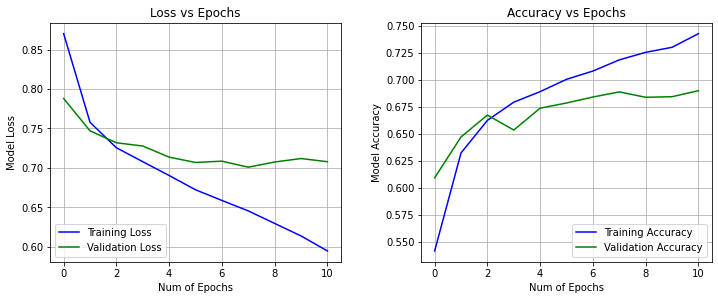

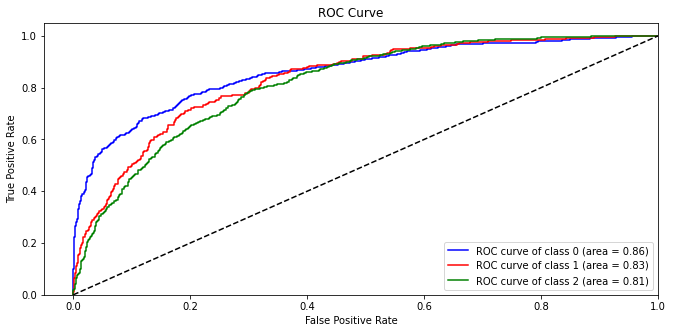


***************************************************************************************************************************
                                                     Grid Search: 42
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.88218,   Train F1 Score = 0.54488,   Validation Loss = 0.78747,   Validation F1 Score = 0.60844
Epoch   1:   Train Loss = 0.76767,   Train F1 Score = 0.62688,   Validation Loss = 0.75648,   Validation F1 Score = 0.65037
Epoch   2:   Train Loss = 0.74073,   Train F1 Score = 0.65218,   Validation Loss = 0.73790,   Validation F1 Score = 0.65100
Epoch   3:   Train Loss = 0.71862,   Train F1 Score = 0.

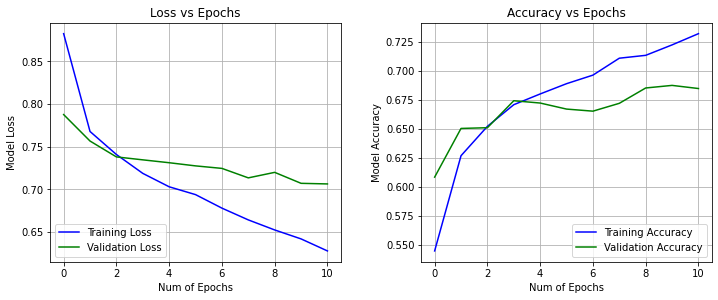

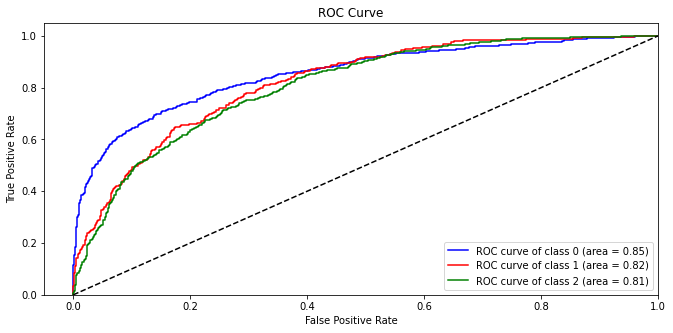


***************************************************************************************************************************
                                                     Grid Search: 43
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.84554,   Train F1 Score = 0.56651,   Validation Loss = 0.77562,   Validation F1 Score = 0.63056
Epoch   1:   Train Loss = 0.74922,   Train F1 Score = 0.64864,   Validation Loss = 0.74684,   Validation F1 Score = 0.64318
Epoch   2:   Train Loss = 0.71972,   Train F1 Score = 0.67050,   Validation Loss = 0.73434,   Validation F1 Score = 0.65461
Epoch   3:   Train Loss = 0.70023,   Train F1 Score = 0.6

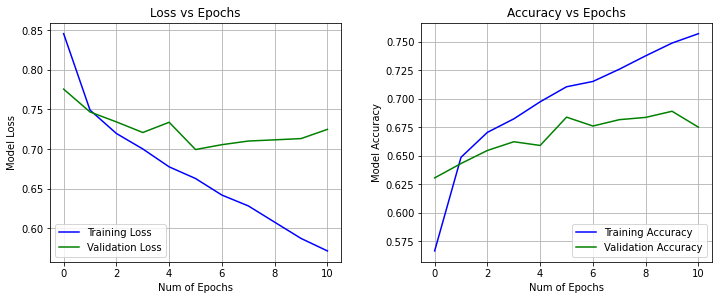

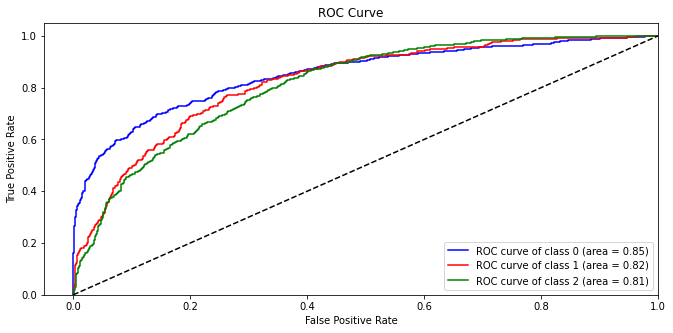


***************************************************************************************************************************
                                                     Grid Search: 44
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85792,   Train F1 Score = 0.56329,   Validation Loss = 0.76649,   Validation F1 Score = 0.62650
Epoch   1:   Train Loss = 0.75165,   Train F1 Score = 0.64226,   Validation Loss = 0.74347,   Validation F1 Score = 0.64512
Epoch   2:   Train Loss = 0.72964,   Train F1 Score = 0.66469,   Validation Loss = 0.73839,   Validation F1 Score = 0.65984
Epoch   3:   Train Loss = 0.70662,   Train F1 Score = 0.6

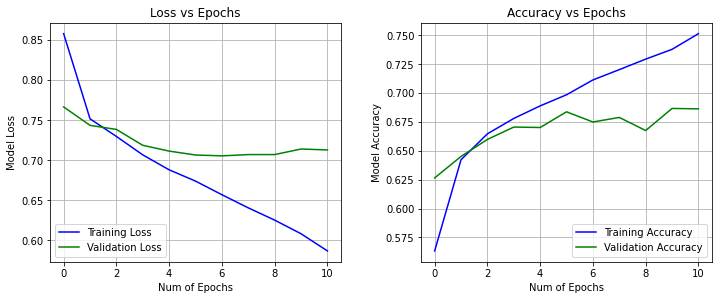

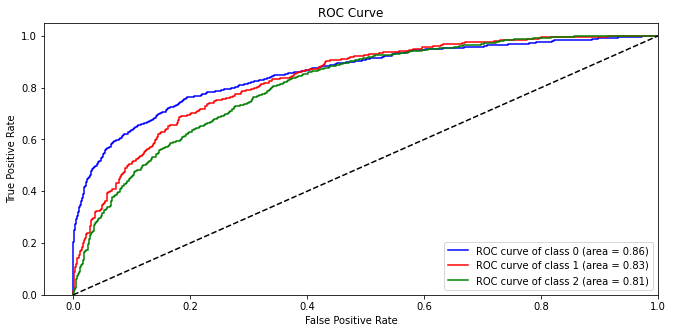


***************************************************************************************************************************
                                                     Grid Search: 45
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.84665,   Train F1 Score = 0.57181,   Validation Loss = 0.76286,   Validation F1 Score = 0.63603
Epoch   1:   Train Loss = 0.74318,   Train F1 Score = 0.64449,   Validation Loss = 0.74984,   Validation F1 Score = 0.65168
Epoch   2:   Train Loss = 0.71556,   Train F1 Score = 0.67136,   Validation Loss = 0.72757,   Validation F1 Score = 0.66382
Epoch   3:   Train Loss = 0.69628,   Train F1 Score = 0.6

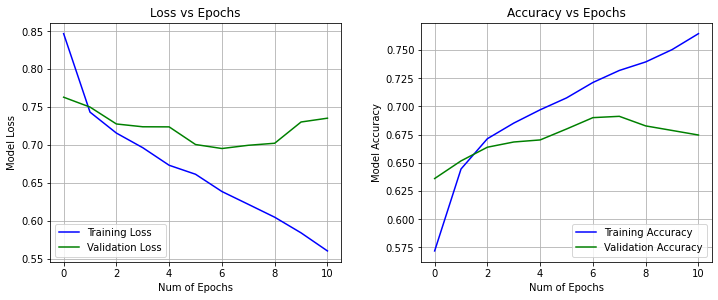

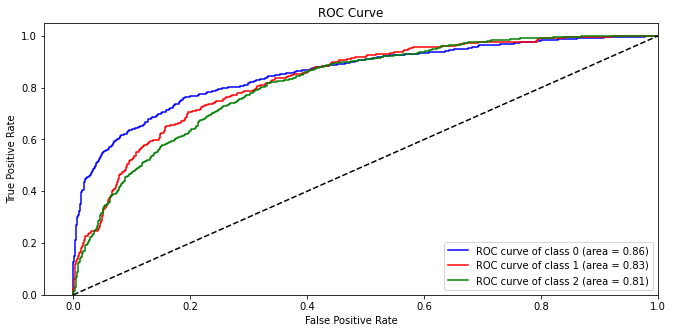


***************************************************************************************************************************
                                                     Grid Search: 46
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86684,   Train F1 Score = 0.55855,   Validation Loss = 0.77166,   Validation F1 Score = 0.62477
Epoch   1:   Train Loss = 0.75536,   Train F1 Score = 0.64273,   Validation Loss = 0.76326,   Validation F1 Score = 0.62432
Epoch   2:   Train Loss = 0.72959,   Train F1 Score = 0.66028,   Validation Loss = 0.73912,   Validation F1 Score = 0.66767
Epoch   3:   Train Loss = 0.70924,   Train F1 Score = 0.6

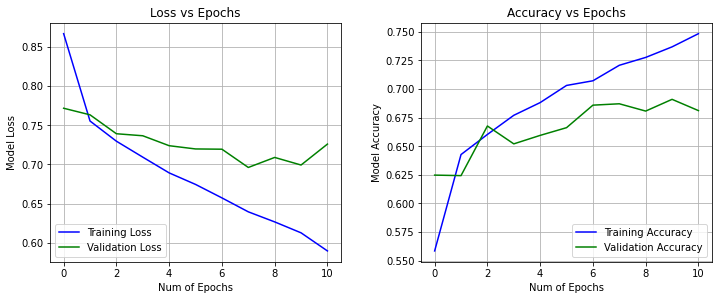

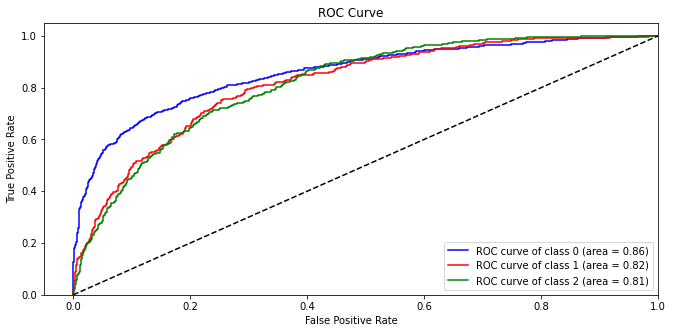


***************************************************************************************************************************
                                                     Grid Search: 47
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.84078,   Train F1 Score = 0.57109,   Validation Loss = 0.76242,   Validation F1 Score = 0.63216
Epoch   1:   Train Loss = 0.74453,   Train F1 Score = 0.64448,   Validation Loss = 0.74642,   Validation F1 Score = 0.66356
Epoch   2:   Train Loss = 0.71830,   Train F1 Score = 0.66409,   Validation Loss = 0.74216,   Validation F1 Score = 0.65644
Epoch   3:   Train Loss = 0.69319,   Train F1 Score = 0.

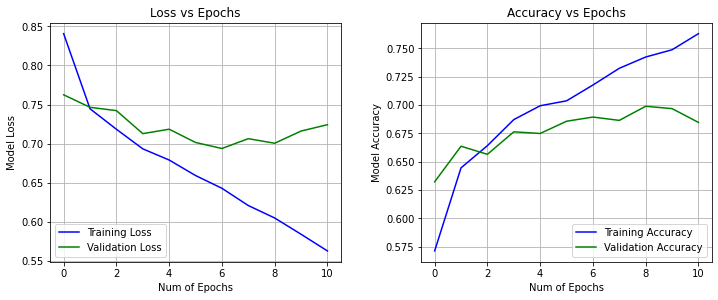

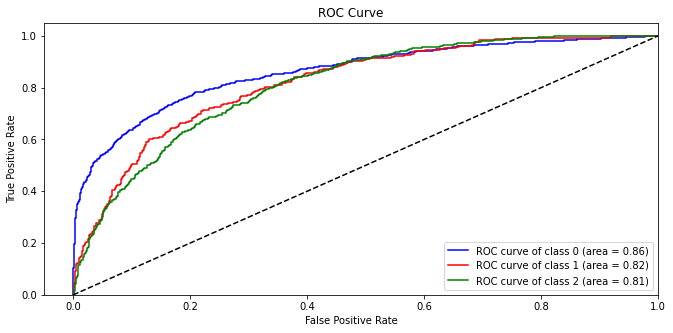


***************************************************************************************************************************
                                                     Grid Search: 48
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 2 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85312,   Train F1 Score = 0.55840,   Validation Loss = 0.77016,   Validation F1 Score = 0.63633
Epoch   1:   Train Loss = 0.75470,   Train F1 Score = 0.64118,   Validation Loss = 0.75697,   Validation F1 Score = 0.63620
Epoch   2:   Train Loss = 0.72684,   Train F1 Score = 0.66313,   Validation Loss = 0.72976,   Validation F1 Score = 0.66364
Epoch   3:   Train Loss = 0.70808,   Train F1 Score = 0.

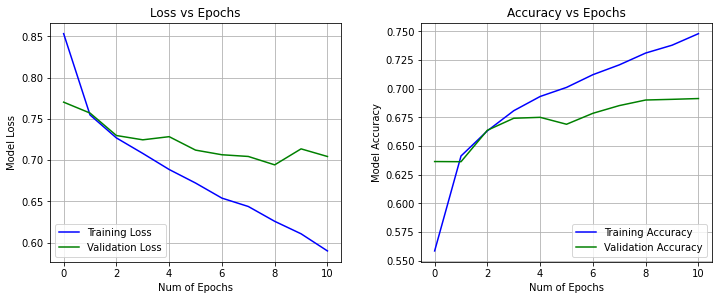

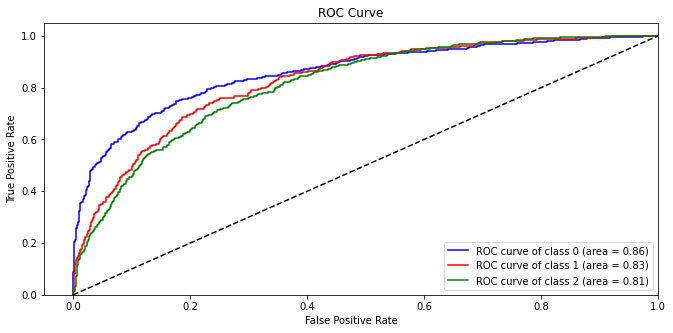


***************************************************************************************************************************
                                                     Grid Search: 49
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85918,   Train F1 Score = 0.55399,   Validation Loss = 0.77696,   Validation F1 Score = 0.61939
Epoch   1:   Train Loss = 0.75211,   Train F1 Score = 0.64040,   Validation Loss = 0.75010,   Validation F1 Score = 0.65004
Epoch   2:   Train Loss = 0.72681,   Train F1 Score = 0.66422,   Validation Loss = 0.72938,   Validation F1 Score = 0.65567
Epoch   3:   Train Loss = 0.70759,   Train F1 Score = 0.6

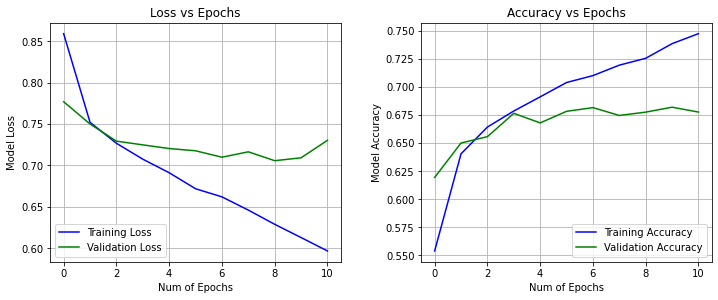

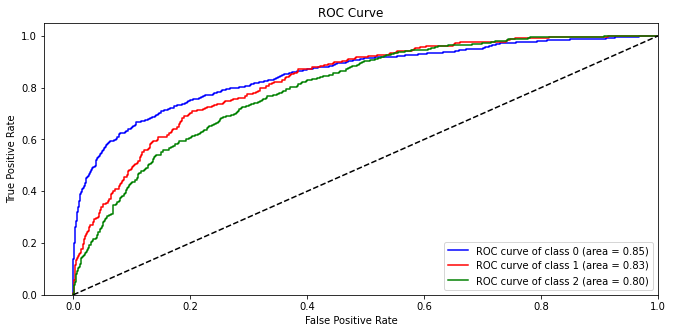


***************************************************************************************************************************
                                                     Grid Search: 50
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87210,   Train F1 Score = 0.54871,   Validation Loss = 0.78384,   Validation F1 Score = 0.61236
Epoch   1:   Train Loss = 0.76821,   Train F1 Score = 0.63187,   Validation Loss = 0.75166,   Validation F1 Score = 0.64220
Epoch   2:   Train Loss = 0.73771,   Train F1 Score = 0.65473,   Validation Loss = 0.74490,   Validation F1 Score = 0.65750
Epoch   3:   Train Loss = 0.71738,   Train F1 Score = 0.6

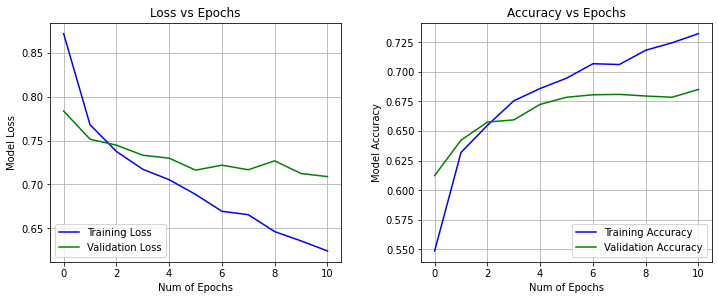

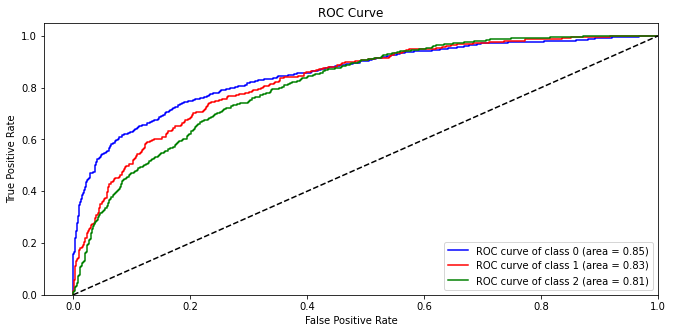


***************************************************************************************************************************
                                                     Grid Search: 51
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85743,   Train F1 Score = 0.56007,   Validation Loss = 0.77832,   Validation F1 Score = 0.61966
Epoch   1:   Train Loss = 0.75294,   Train F1 Score = 0.64171,   Validation Loss = 0.74755,   Validation F1 Score = 0.63963
Epoch   2:   Train Loss = 0.72583,   Train F1 Score = 0.66386,   Validation Loss = 0.73534,   Validation F1 Score = 0.65094
Epoch   3:   Train Loss = 0.70709,   Train F1 Score = 0.6

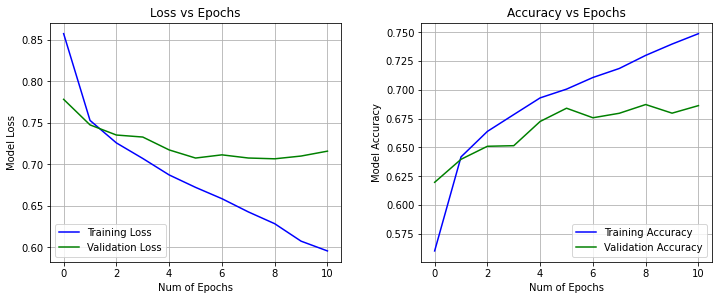

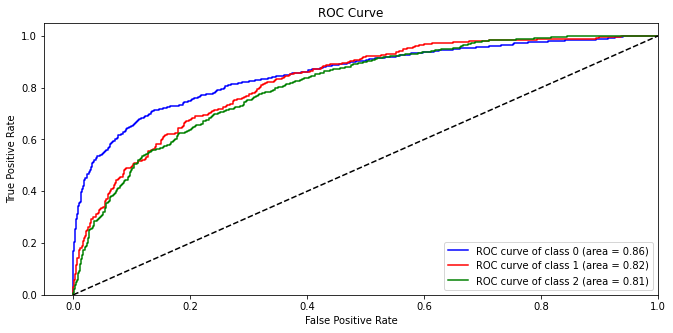


***************************************************************************************************************************
                                                     Grid Search: 52
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87513,   Train F1 Score = 0.54257,   Validation Loss = 0.79505,   Validation F1 Score = 0.60995
Epoch   1:   Train Loss = 0.76836,   Train F1 Score = 0.63006,   Validation Loss = 0.76048,   Validation F1 Score = 0.65431
Epoch   2:   Train Loss = 0.73681,   Train F1 Score = 0.65965,   Validation Loss = 0.75173,   Validation F1 Score = 0.65562
Epoch   3:   Train Loss = 0.72204,   Train F1 Score = 0.6

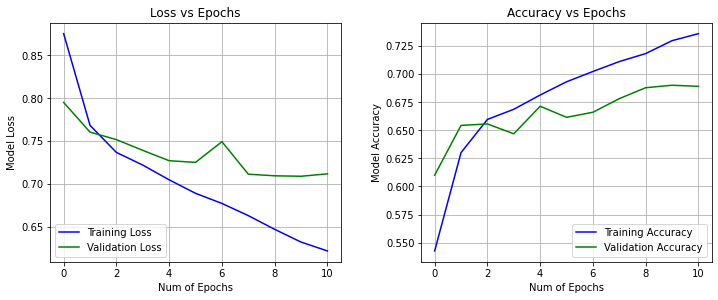

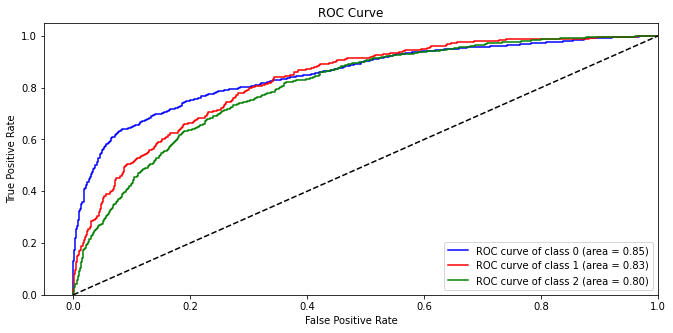


***************************************************************************************************************************
                                                     Grid Search: 53
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85603,   Train F1 Score = 0.55803,   Validation Loss = 0.77210,   Validation F1 Score = 0.61872
Epoch   1:   Train Loss = 0.75646,   Train F1 Score = 0.64164,   Validation Loss = 0.75759,   Validation F1 Score = 0.65728
Epoch   2:   Train Loss = 0.73121,   Train F1 Score = 0.65968,   Validation Loss = 0.73393,   Validation F1 Score = 0.66050
Epoch   3:   Train Loss = 0.70687,   Train F1 Score = 0.

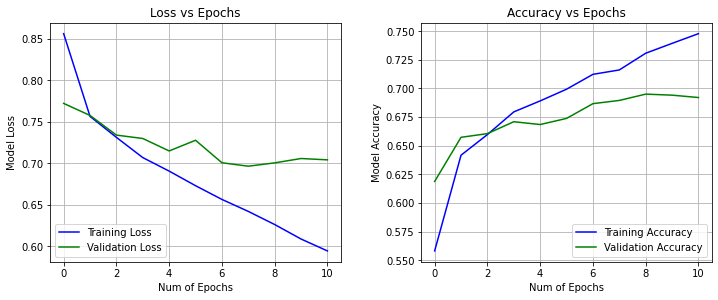

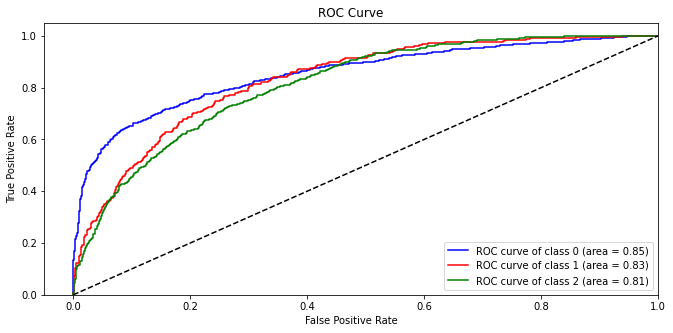


***************************************************************************************************************************
                                                     Grid Search: 54
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87438,   Train F1 Score = 0.55041,   Validation Loss = 0.79116,   Validation F1 Score = 0.60922
Epoch   1:   Train Loss = 0.76840,   Train F1 Score = 0.63069,   Validation Loss = 0.75373,   Validation F1 Score = 0.64384
Epoch   2:   Train Loss = 0.74025,   Train F1 Score = 0.65209,   Validation Loss = 0.74413,   Validation F1 Score = 0.64899
Epoch   3:   Train Loss = 0.71887,   Train F1 Score = 0.

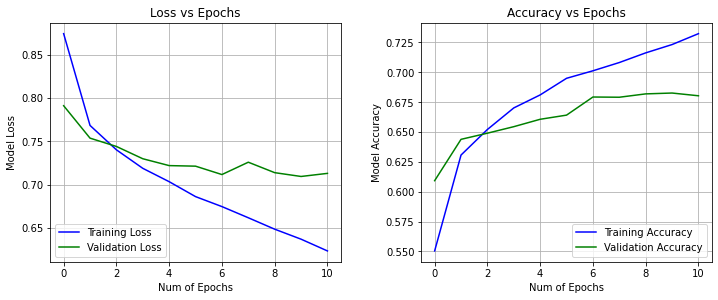

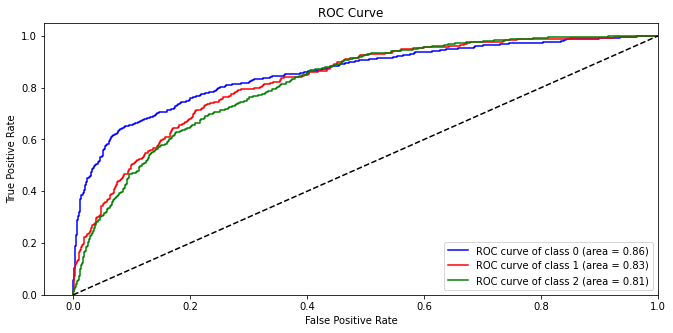


***************************************************************************************************************************
                                                     Grid Search: 55
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.83843,   Train F1 Score = 0.56515,   Validation Loss = 0.76671,   Validation F1 Score = 0.63706
Epoch   1:   Train Loss = 0.74721,   Train F1 Score = 0.64931,   Validation Loss = 0.75981,   Validation F1 Score = 0.63412
Epoch   2:   Train Loss = 0.72396,   Train F1 Score = 0.66785,   Validation Loss = 0.72989,   Validation F1 Score = 0.65915
Epoch   3:   Train Loss = 0.69670,   Train F1 Score = 0.6

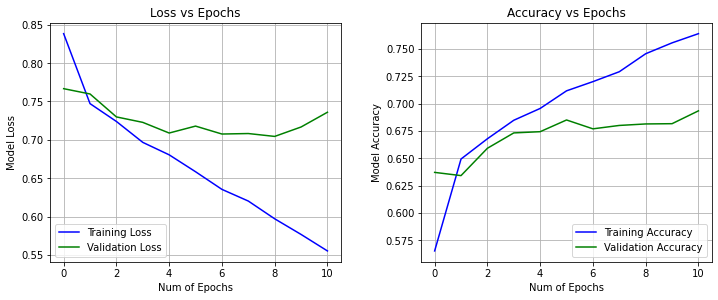

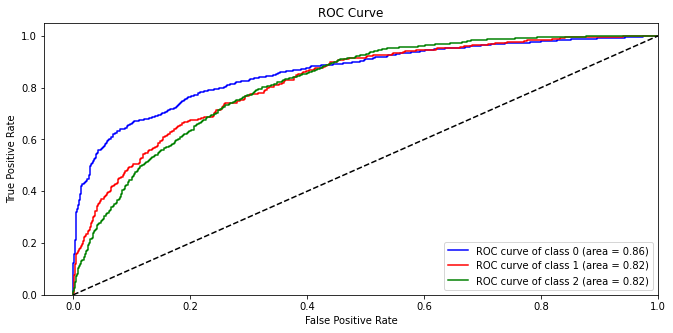


***************************************************************************************************************************
                                                     Grid Search: 56
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.84861,   Train F1 Score = 0.56553,   Validation Loss = 0.80734,   Validation F1 Score = 0.61124
Epoch   1:   Train Loss = 0.75611,   Train F1 Score = 0.64459,   Validation Loss = 0.75408,   Validation F1 Score = 0.64434
Epoch   2:   Train Loss = 0.72455,   Train F1 Score = 0.66629,   Validation Loss = 0.73558,   Validation F1 Score = 0.66551
Epoch   3:   Train Loss = 0.70412,   Train F1 Score = 0.6

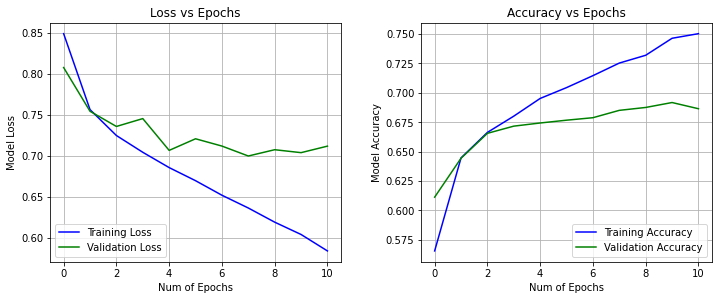

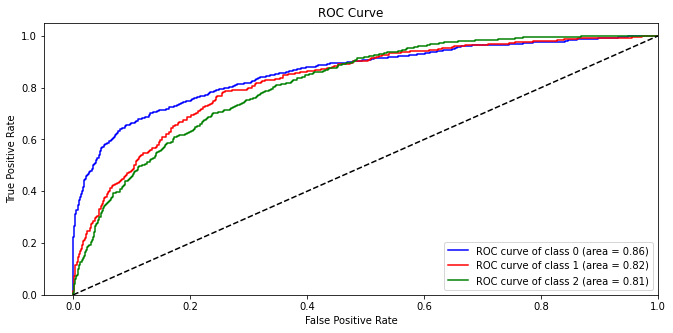


***************************************************************************************************************************
                                                     Grid Search: 57
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.83473,   Train F1 Score = 0.57581,   Validation Loss = 0.77143,   Validation F1 Score = 0.62814
Epoch   1:   Train Loss = 0.74272,   Train F1 Score = 0.65088,   Validation Loss = 0.74810,   Validation F1 Score = 0.64865
Epoch   2:   Train Loss = 0.71972,   Train F1 Score = 0.67000,   Validation Loss = 0.72582,   Validation F1 Score = 0.65510
Epoch   3:   Train Loss = 0.69687,   Train F1 Score = 0.6

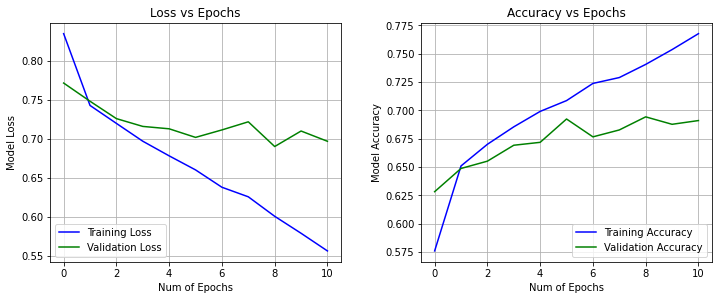

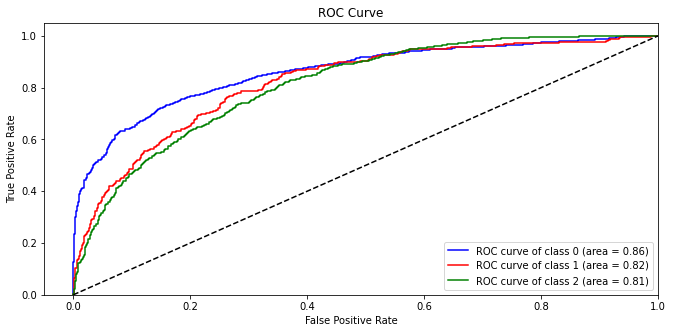


***************************************************************************************************************************
                                                     Grid Search: 58
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.84770,   Train F1 Score = 0.56325,   Validation Loss = 0.77666,   Validation F1 Score = 0.61768
Epoch   1:   Train Loss = 0.75720,   Train F1 Score = 0.64139,   Validation Loss = 0.73879,   Validation F1 Score = 0.65301
Epoch   2:   Train Loss = 0.72419,   Train F1 Score = 0.66551,   Validation Loss = 0.72999,   Validation F1 Score = 0.65939
Epoch   3:   Train Loss = 0.70355,   Train F1 Score = 0.6

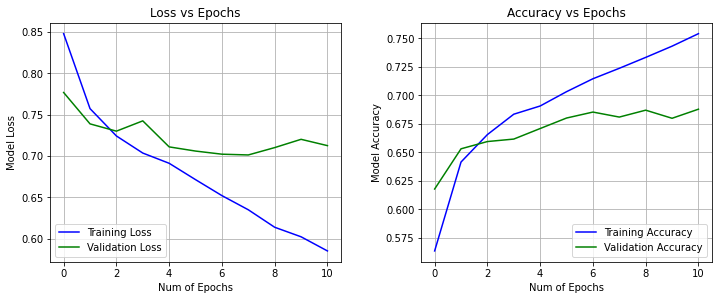

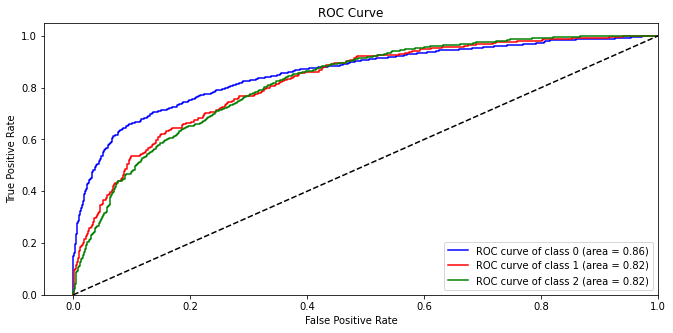


***************************************************************************************************************************
                                                     Grid Search: 59
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.83852,   Train F1 Score = 0.57111,   Validation Loss = 0.78871,   Validation F1 Score = 0.63803
Epoch   1:   Train Loss = 0.74746,   Train F1 Score = 0.65093,   Validation Loss = 0.74542,   Validation F1 Score = 0.66366
Epoch   2:   Train Loss = 0.72003,   Train F1 Score = 0.66897,   Validation Loss = 0.72441,   Validation F1 Score = 0.67131
Epoch   3:   Train Loss = 0.69635,   Train F1 Score = 0.

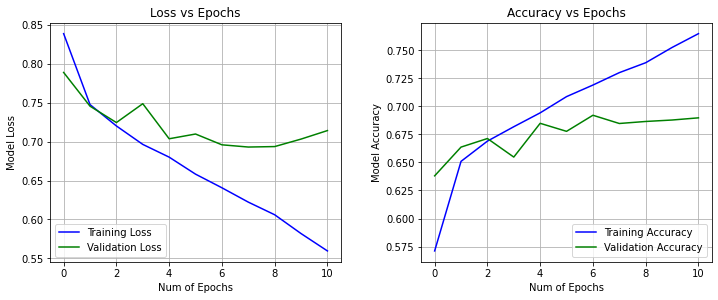

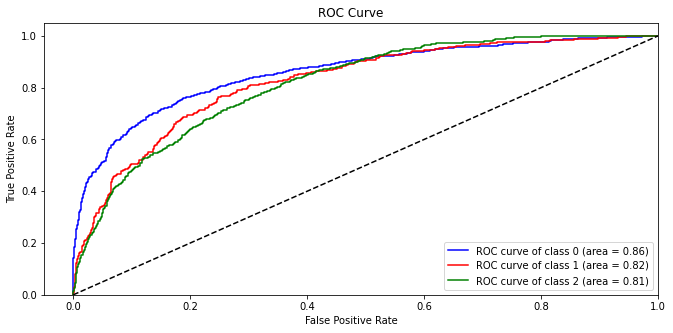


***************************************************************************************************************************
                                                     Grid Search: 60
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 3 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85354,   Train F1 Score = 0.55244,   Validation Loss = 0.76916,   Validation F1 Score = 0.62704
Epoch   1:   Train Loss = 0.75574,   Train F1 Score = 0.64690,   Validation Loss = 0.74899,   Validation F1 Score = 0.65294
Epoch   2:   Train Loss = 0.72711,   Train F1 Score = 0.66902,   Validation Loss = 0.73649,   Validation F1 Score = 0.66305
Epoch   3:   Train Loss = 0.70858,   Train F1 Score = 0.

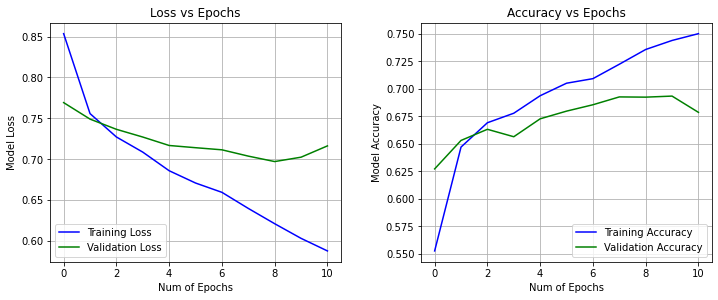

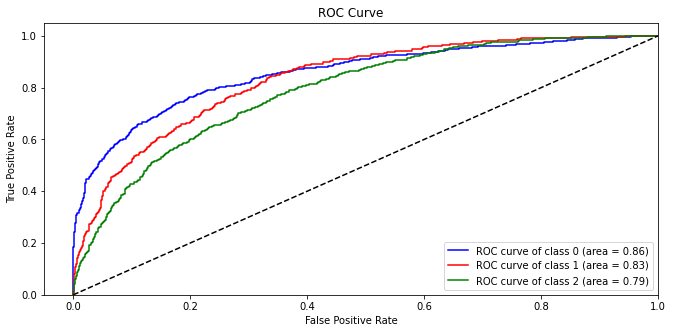


***************************************************************************************************************************
                                                     Grid Search: 61
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85770,   Train F1 Score = 0.56034,   Validation Loss = 0.80605,   Validation F1 Score = 0.61323
Epoch   1:   Train Loss = 0.76155,   Train F1 Score = 0.63692,   Validation Loss = 0.75154,   Validation F1 Score = 0.66257
Epoch   2:   Train Loss = 0.72865,   Train F1 Score = 0.66518,   Validation Loss = 0.75261,   Validation F1 Score = 0.65168
Epoch   3:   Train Loss = 0.70798,   Train F1 Score = 0.6

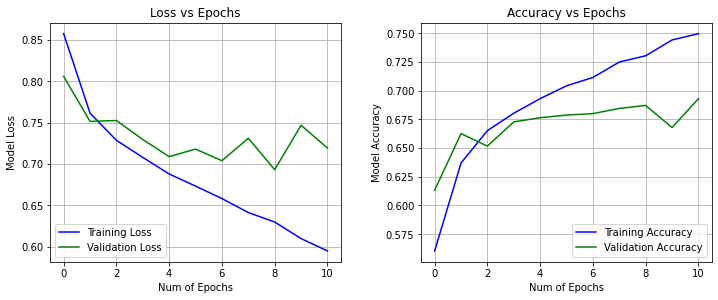

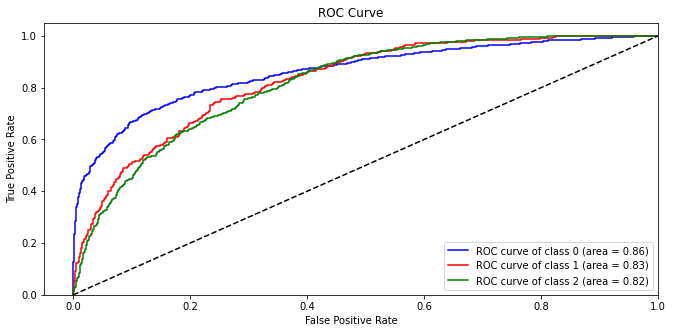


***************************************************************************************************************************
                                                     Grid Search: 62
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.87801,   Train F1 Score = 0.53738,   Validation Loss = 0.78359,   Validation F1 Score = 0.62623
Epoch   1:   Train Loss = 0.76521,   Train F1 Score = 0.63728,   Validation Loss = 0.77318,   Validation F1 Score = 0.65025
Epoch   2:   Train Loss = 0.73779,   Train F1 Score = 0.66391,   Validation Loss = 0.75133,   Validation F1 Score = 0.66954
Epoch   3:   Train Loss = 0.72315,   Train F1 Score = 0.6

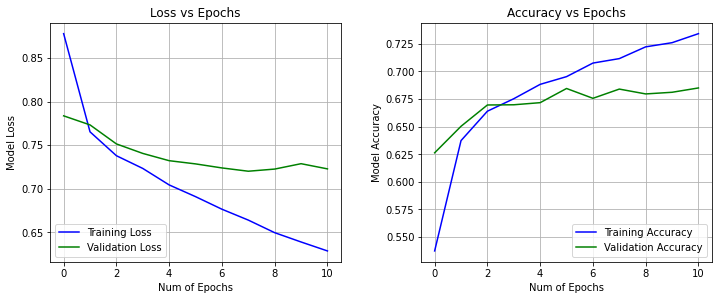

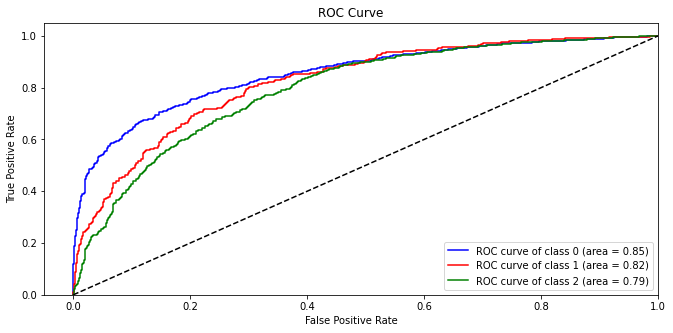


***************************************************************************************************************************
                                                     Grid Search: 63
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86102,   Train F1 Score = 0.54961,   Validation Loss = 0.78590,   Validation F1 Score = 0.61919
Epoch   1:   Train Loss = 0.75302,   Train F1 Score = 0.65089,   Validation Loss = 0.74814,   Validation F1 Score = 0.64463
Epoch   2:   Train Loss = 0.72988,   Train F1 Score = 0.66742,   Validation Loss = 0.74649,   Validation F1 Score = 0.65663
Epoch   3:   Train Loss = 0.70378,   Train F1 Score = 0.6

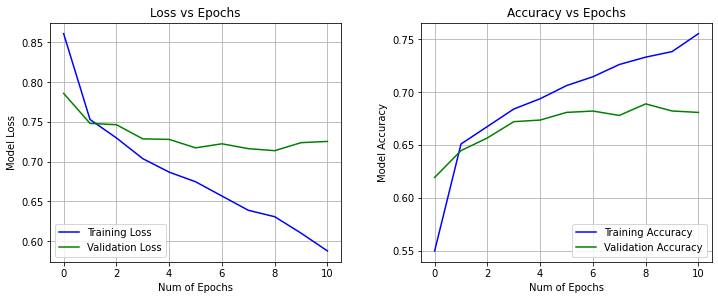

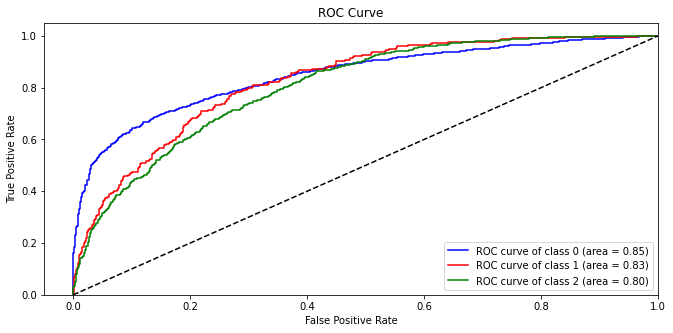


***************************************************************************************************************************
                                                     Grid Search: 64
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86915,   Train F1 Score = 0.55060,   Validation Loss = 0.78310,   Validation F1 Score = 0.62329
Epoch   1:   Train Loss = 0.76555,   Train F1 Score = 0.64230,   Validation Loss = 0.76011,   Validation F1 Score = 0.64419
Epoch   2:   Train Loss = 0.74454,   Train F1 Score = 0.65897,   Validation Loss = 0.75686,   Validation F1 Score = 0.66369
Epoch   3:   Train Loss = 0.72434,   Train F1 Score = 0.6

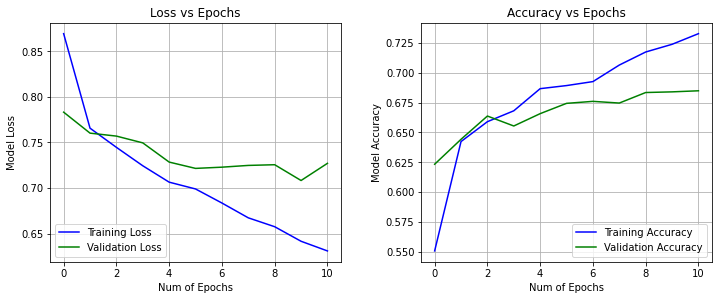

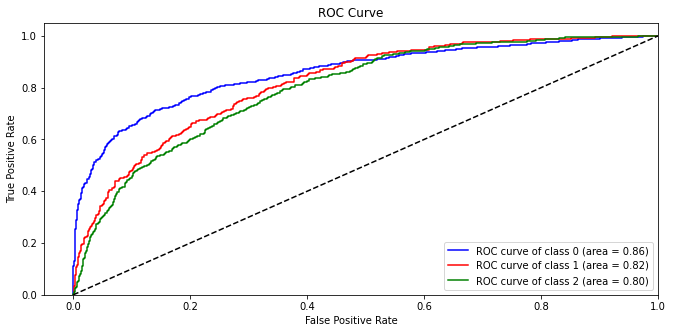


***************************************************************************************************************************
                                                     Grid Search: 65
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.84754,   Train F1 Score = 0.56382,   Validation Loss = 0.77966,   Validation F1 Score = 0.64731
Epoch   1:   Train Loss = 0.75450,   Train F1 Score = 0.64952,   Validation Loss = 0.75381,   Validation F1 Score = 0.65393
Epoch   2:   Train Loss = 0.72950,   Train F1 Score = 0.66536,   Validation Loss = 0.74434,   Validation F1 Score = 0.64950
Epoch   3:   Train Loss = 0.70452,   Train F1 Score = 0.

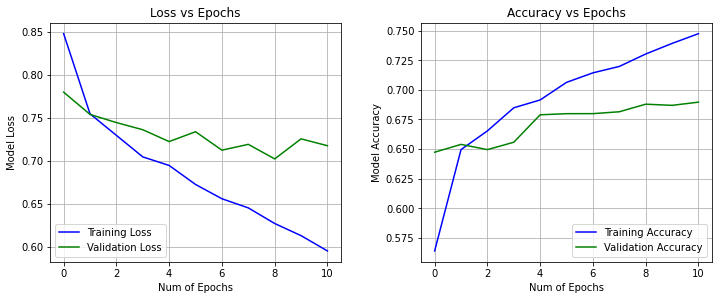

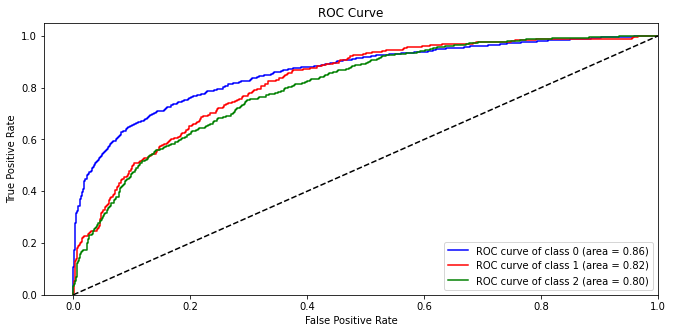


***************************************************************************************************************************
                                                     Grid Search: 66
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 128 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.88587,   Train F1 Score = 0.54217,   Validation Loss = 0.79392,   Validation F1 Score = 0.59690
Epoch   1:   Train Loss = 0.77085,   Train F1 Score = 0.63172,   Validation Loss = 0.76383,   Validation F1 Score = 0.66757
Epoch   2:   Train Loss = 0.73970,   Train F1 Score = 0.65832,   Validation Loss = 0.75875,   Validation F1 Score = 0.65346
Epoch   3:   Train Loss = 0.71943,   Train F1 Score = 0.

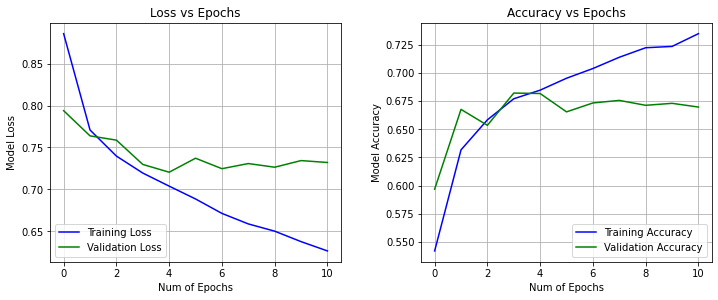

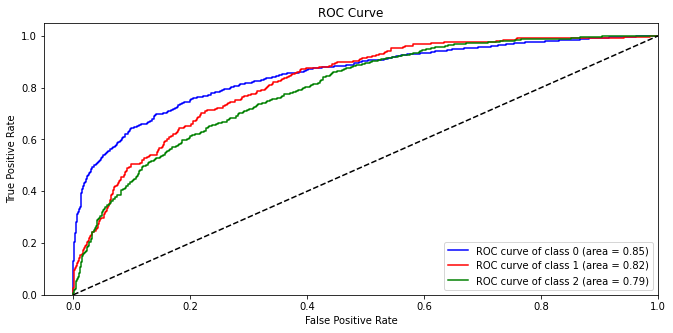


***************************************************************************************************************************
                                                     Grid Search: 67
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.84129,   Train F1 Score = 0.57807,   Validation Loss = 0.77045,   Validation F1 Score = 0.64203
Epoch   1:   Train Loss = 0.75198,   Train F1 Score = 0.65083,   Validation Loss = 0.75116,   Validation F1 Score = 0.67213
Epoch   2:   Train Loss = 0.72808,   Train F1 Score = 0.66709,   Validation Loss = 0.74175,   Validation F1 Score = 0.66070
Epoch   3:   Train Loss = 0.70120,   Train F1 Score = 0.6

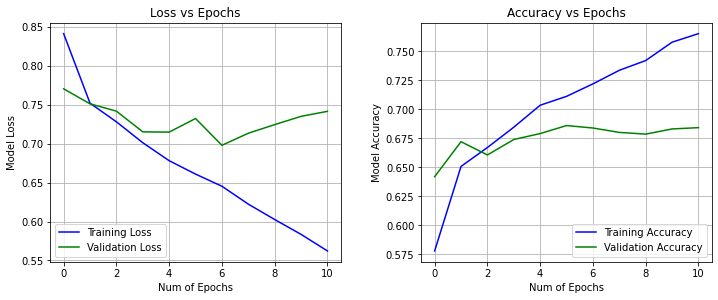

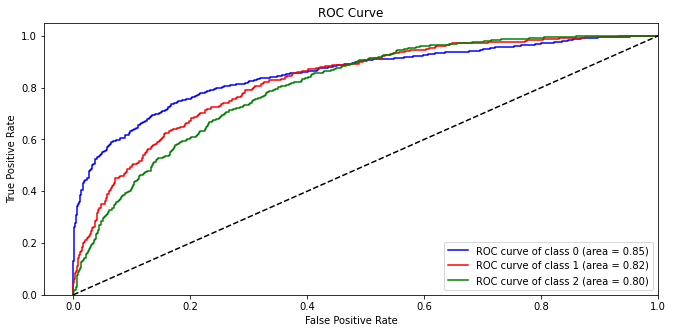


***************************************************************************************************************************
                                                     Grid Search: 68
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 1 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85233,   Train F1 Score = 0.55563,   Validation Loss = 0.77932,   Validation F1 Score = 0.61435
Epoch   1:   Train Loss = 0.75617,   Train F1 Score = 0.65114,   Validation Loss = 0.76387,   Validation F1 Score = 0.65959
Epoch   2:   Train Loss = 0.72966,   Train F1 Score = 0.66543,   Validation Loss = 0.74754,   Validation F1 Score = 0.65800
Epoch   3:   Train Loss = 0.70665,   Train F1 Score = 0.6

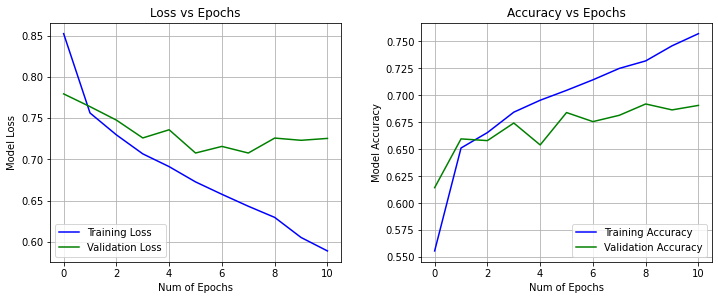

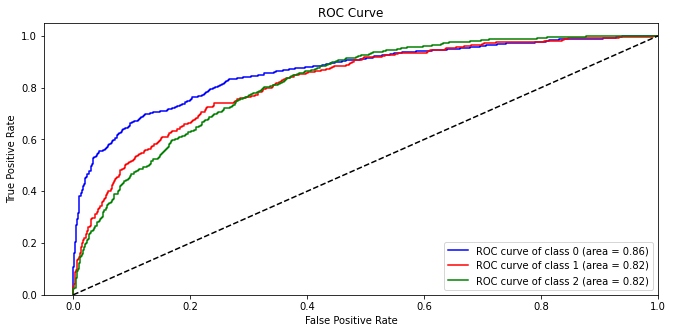


***************************************************************************************************************************
                                                     Grid Search: 69
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.84368,   Train F1 Score = 0.56993,   Validation Loss = 0.76485,   Validation F1 Score = 0.64266
Epoch   1:   Train Loss = 0.75063,   Train F1 Score = 0.64980,   Validation Loss = 0.75259,   Validation F1 Score = 0.64944
Epoch   2:   Train Loss = 0.72308,   Train F1 Score = 0.67082,   Validation Loss = 0.73179,   Validation F1 Score = 0.66587
Epoch   3:   Train Loss = 0.69768,   Train F1 Score = 0.6

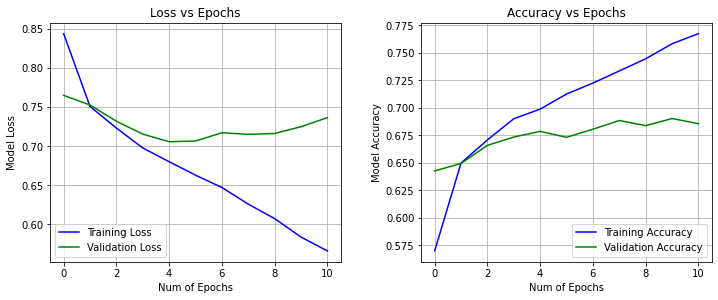

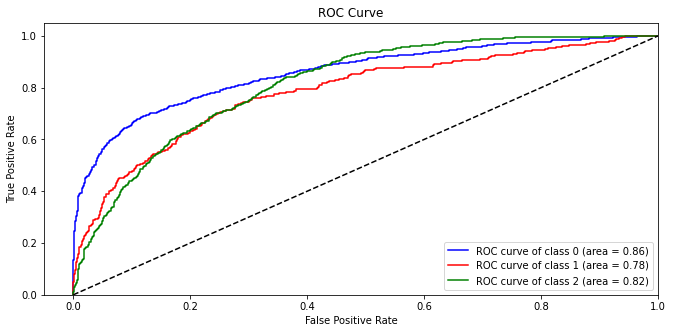


***************************************************************************************************************************
                                                     Grid Search: 70
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86169,   Train F1 Score = 0.54581,   Validation Loss = 0.77556,   Validation F1 Score = 0.63137
Epoch   1:   Train Loss = 0.75871,   Train F1 Score = 0.65011,   Validation Loss = 0.78291,   Validation F1 Score = 0.65487
Epoch   2:   Train Loss = 0.73164,   Train F1 Score = 0.66542,   Validation Loss = 0.76847,   Validation F1 Score = 0.65618
Epoch   3:   Train Loss = 0.71157,   Train F1 Score = 0.6

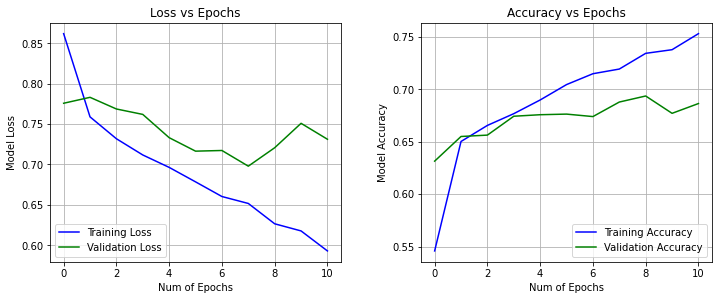

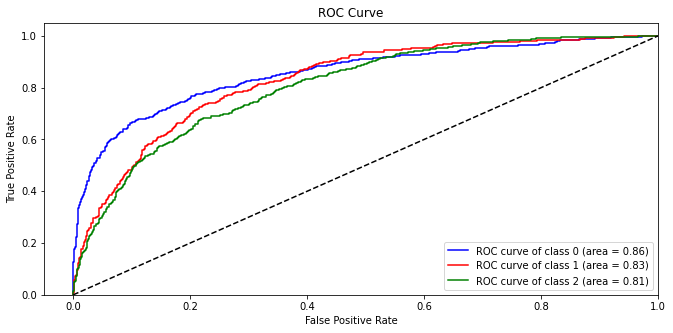


***************************************************************************************************************************
                                                     Grid Search: 71
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.3 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.83309,   Train F1 Score = 0.57711,   Validation Loss = 0.78598,   Validation F1 Score = 0.62292
Epoch   1:   Train Loss = 0.75372,   Train F1 Score = 0.65202,   Validation Loss = 0.76306,   Validation F1 Score = 0.62334
Epoch   2:   Train Loss = 0.72611,   Train F1 Score = 0.66908,   Validation Loss = 0.73780,   Validation F1 Score = 0.66384
Epoch   3:   Train Loss = 0.70342,   Train F1 Score = 0.

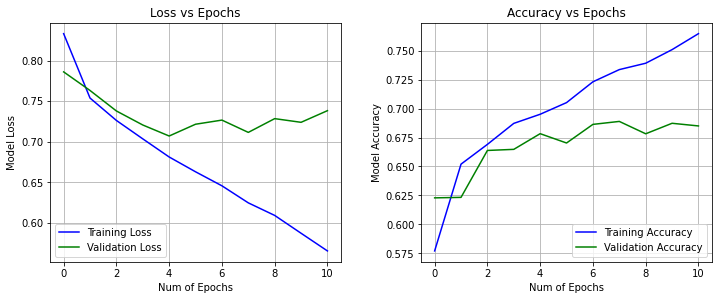

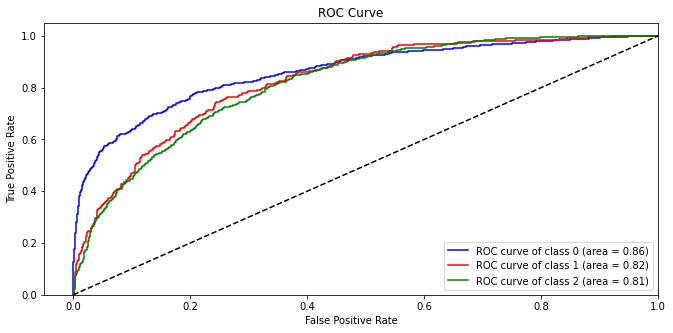


***************************************************************************************************************************
                                                     Grid Search: 72
***************************************************************************************************************************
GRU Model 
Number of Stacked RNNs: 5 
Hidden Layers: 256 
Gradient Clipping: 10 
Dropout Probability: 0.5 
Learning Rate: 0.00035
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.85627,   Train F1 Score = 0.56069,   Validation Loss = 0.76954,   Validation F1 Score = 0.62675
Epoch   1:   Train Loss = 0.76052,   Train F1 Score = 0.64462,   Validation Loss = 0.75887,   Validation F1 Score = 0.66215
Epoch   2:   Train Loss = 0.72950,   Train F1 Score = 0.66238,   Validation Loss = 0.74350,   Validation F1 Score = 0.64414
Epoch   3:   Train Loss = 0.71122,   Train F1 Score = 0.

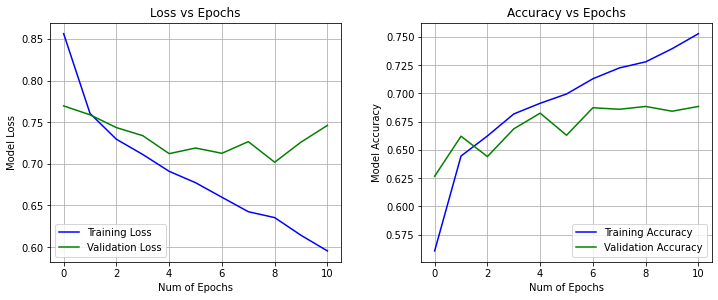

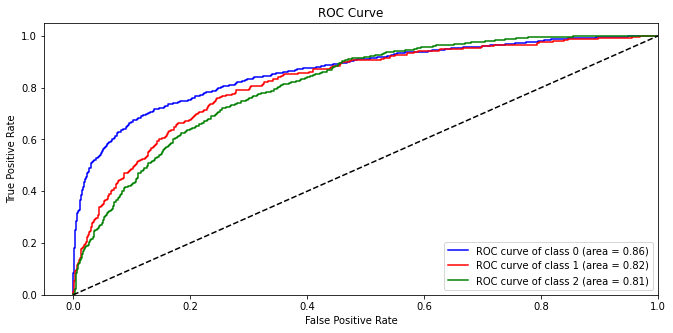

In [ ]:
cell_types = ['LSTM', 'GRU']
num_layers = [2, 3, 5]
hidden_layers = [128, 256]
learning_rates = [3.5e-04]
grad_clippings = [1, 5, 10]
drop_probs = [0.3, 0.5]
attention_flag = False

myGridSearch(cell_types, num_layers, hidden_layers, grad_clippings, drop_probs, learning_rates, attention_flag)

## Best Model
Based on the previous observations we concluded to the following hyperparameters for our best model: <br>
* LSTM Model 
* Number of Stacked RNNs: 2 
* Hidden Layers: 80 
* Gradient Clipping: 5 
* Dropout Probability: 0.5 
* Learning Rate: 0.00015


***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 80 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00015
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.99879,   Train F1 Score = 0.39260,   Validation Loss = 0.91029,   Validation F1 Score = 0.54271
Epoch   1:   Train Loss = 0.85569,   Train F1 Score = 0.57251,   Validation Loss = 0.80667,   Validation F1 Score = 0.60124
Epoch   2:   Train Loss = 0.79370,   Train F1 Score = 0.60819,   Validation Loss = 0.78147,   Validation F1 Score = 0.60793
Epoch   3:   Train Loss = 0.77541,   Train F1 Score = 0.61

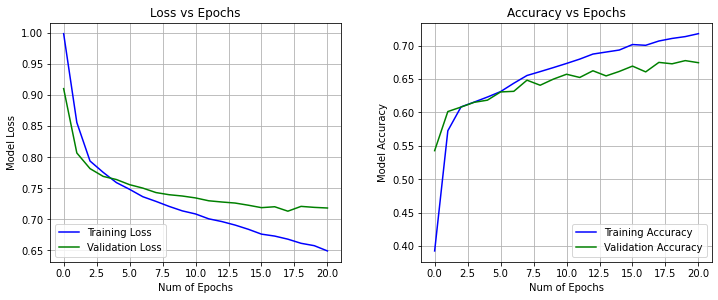

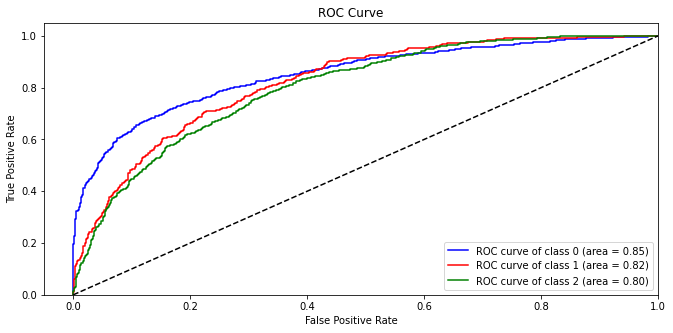

In [ ]:
cell_types = ['LSTM']
num_layers = [2]
hidden_layers = [80]
learning_rates = [1.5e-04]
grad_clippings = [5]
drop_probs = [0.5]
attention_flag = False

myGridSearch(cell_types, num_layers, hidden_layers, grad_clippings, drop_probs, learning_rates, attention_flag)

## Adding attention to the best model

With the addition of attention mechanism, our model perdorms slightly better in terms of accuracy (+0.01%) and according to the roc curve results, we get better predictions for class 0. <br>



***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
LSTM Model 
Number of Stacked RNNs: 2 
Hidden Layers: 80 
Gradient Clipping: 5 
Dropout Probability: 0.5 
Learning Rate: 0.00015
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.98437,   Train F1 Score = 0.46696,   Validation Loss = 0.87668,   Validation F1 Score = 0.56911
Epoch   1:   Train Loss = 0.83206,   Train F1 Score = 0.58787,   Validation Loss = 0.78925,   Validation F1 Score = 0.60798
Epoch   2:   Train Loss = 0.77697,   Train F1 Score = 0.61228,   Validation Loss = 0.77341,   Validation F1 Score = 0.60457
Epoch   3:   Train Loss = 0.75812,   Train F1 Score = 0.62

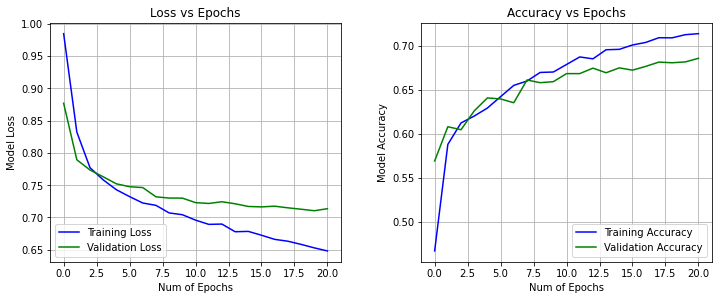

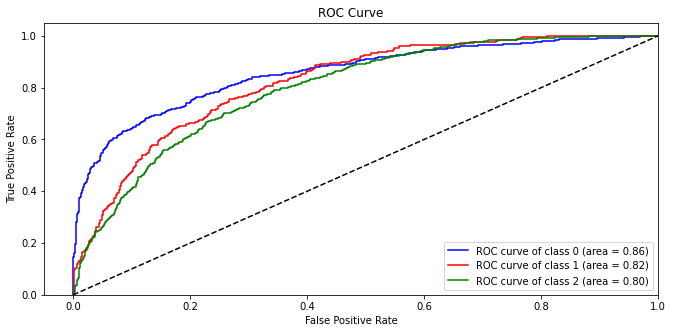

In [ ]:
cell_types = ['LSTM']
num_layers = [2]
hidden_layers = [80]
learning_rates = [1.5e-04]
grad_clippings = [5]
drop_probs = [0.5]
attention_flag = True

myGridSearch(cell_types, num_layers, hidden_layers, grad_clippings, drop_probs, learning_rates, attention_flag)

## Test set section

### Training and testing

In [ ]:
import torch
torch.manual_seed(0)

def train_model_and_test():

    train_losses, total_train_loses = [], []
    train_precision_scores, total_train_precision_scores = [], []
    train_f1_scores, total_train_f1_scores = [], []
    train_recall_scores, total_train_recall_scores = [], []
    train_acc, total_train_acc = [], []

    test_losses, total_test_loses = [], []
    test_precision_scores, total_test_precision_scores = [], []
    test_f1_scores, total_test_f1_scores = [], []
    test_recall_scores, total_test_recall_scores = [], []
    test_acc, total_test_acc = [], []

    test_predictions = np.empty((0, 3))

    # Parameters of best model
    input_dim = embedding_size
    output_dim = 3
    hidden_layer = 80
    num_layer = 2
    cell_type = 'LSTM'
    learning_rate = 1.5e-04
    drop_prob = 0.5
    clip = 5
    attention_flag = True
    num_epochs = 21
    batch_size = 128

    model = SentimentRNN(output_dim, input_dim, hidden_layer, num_layer, cell_type, attention_flag, drop_prob).to(device)
    optim = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_func = nn.CrossEntropyLoss().to(device)

    print(u'\u2500' * 111)
    # print()
    print(cell_type, "Model", "\nNumber of Stacked RNNs:", num_layer, "\nHidden Layers:", hidden_layer, "\nGradient Clipping:", clip, "\nDropout Probability:", drop_prob, "\nLearning Rate:", learning_rate)
    # print()
    print(u'\u2500' * 111)

    dataset_train = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
    dataset_test = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
   
    dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, shuffle=True, drop_last=True)
    dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True)

    for epoch in range(num_epochs):
        train_losses, train_precision_scores, train_f1_scores, train_recall_scores, train_acc = [], [], [], [], []
        test_losses, test_precision_scores, test_f1_scores, test_recall_scores, test_acc = [], [], [], [], []

        model.train()

        # initialize hidden state
        h = model.init_hidden(batch_size)
        eval_h = model.init_hidden(batch_size)

        # Train model
        for x_batch, y_batch in dataloader_train:

            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            if model.cell_type == 'LSTM':
                h = tuple([each.data for each in h])
            else:
                h.detach_()
                h = h.detach()

            y_pred, h = model(x_batch, h)

            # Calcualte loss of train data
            loss = loss_func(y_pred.to(device), one_hot_reverse_matrix(y_batch).type(torch.LongTensor).to(device))
            train_losses.append(loss.item())

            optim.zero_grad() #Delete previously stored gradients
            loss.backward() #Perform backpropagation starting from the loss calculated in this epoch
            nn.utils.clip_grad_norm_(model.parameters(), clip) # `clip_grad_norm` helps prevent the exploding gradient problem in LSTM/GRU
            optim.step() #Update model's weights based on the gradients calculated during backprop
          
            # Reshape predicted and true labels
            # This convertion is necessary for the scoring functions
            y_pred = torch.argmax(y_pred, dim=1).cpu().numpy().reshape(-1,1)
            y_batch = torch.argmax(y_batch, dim=1).cpu().numpy().reshape(-1,1)
            
            # Calculate scores of train data

            score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
            train_precision_scores.append(score)
            
            score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
            train_f1_scores.append(score)
            
            score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
            train_recall_scores.append(score)

            acc = accuracy_score(y_batch, y_pred)
            train_acc.append(acc)

        model.eval()

        # Test model
        for x_batch, y_batch in dataloader_test:

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            if model.cell_type == 'LSTM':
                eval_h = tuple([each.data for each in eval_h])
            else:
                eval_h.detach_()
                eval_h = eval_h.detach()


            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            y_pred, eval_h = model(x_batch, eval_h)

            # Calculate loss of validation data
            loss = loss_func(y_pred.to(device), one_hot_reverse_matrix(y_batch).type(torch.LongTensor).to(device))
            test_losses.append(loss.item())

            if epoch == num_epochs - 1:
                test_predictions=np.concatenate((test_predictions,y_pred.detach().cpu().numpy()))

            y_pred = torch.argmax(y_pred, dim=1).cpu().numpy().reshape(-1,1)
            y_batch = torch.argmax(y_batch, dim=1).cpu().numpy().reshape(-1,1)

            # Calculate scores of test data

            score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
            test_precision_scores.append(score)
            
            score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
            test_f1_scores.append(score)
            
            score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
            test_recall_scores.append(score)

            acc = accuracy_score(y_batch, y_pred)
            test_acc.append(acc)

        # Add train scores to corresponding lists
        total_train_loses.append(sum(train_losses)/len(dataloader_train))
        total_train_precision_scores.append(sum(train_precision_scores)/len(dataloader_train))
        total_train_f1_scores.append(sum(train_f1_scores)/len(dataloader_train))
        total_train_recall_scores.append(sum(train_recall_scores)/len(dataloader_train))
        total_train_acc.append(sum(train_acc)/len(dataloader_train))

        # Add test scores to corresponding lists
        total_test_loses.append(sum(test_losses)/len(dataloader_test))
        total_test_precision_scores.append(sum(test_precision_scores)/len(dataloader_test))
        total_test_f1_scores.append(sum(test_f1_scores)/len(dataloader_test))
        total_test_recall_scores.append(sum(test_recall_scores)/len(dataloader_test))
        total_test_acc.append(sum(test_acc)/len(dataloader_test))

        print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train F1 Score = {sum(train_f1_scores)/len(dataloader_train):.5f},   Test Loss = {sum(test_losses)/len(dataloader_test):.5f},   Test F1 Score = {sum(test_f1_scores)/len(dataloader_test):.5f}")

    # print()
    print(u'\u2500' * 111)
    print("Train Precision Score =", '{:.5}'.format(sum(train_precision_scores)/len(dataloader_train)))
    print("Train F1 Score =", '{:.5}'.format(sum(train_f1_scores)/len(dataloader_train)))
    print("Train Recall Score =", '{:.5}'.format(sum(train_recall_scores)/len(dataloader_train)))
    print()
    print("test Precision Score =", '{:.5}'.format(sum(test_precision_scores)/len(dataloader_test)))
    print("test F1 Score =", '{:.5}'.format(sum(test_f1_scores)/len(dataloader_test)))
    print("test Recall Score =", '{:.5}'.format(sum(test_recall_scores)/len(dataloader_test)))
    # print()
    print(u'\u2500' * 111, "\n")

    make_plots([i for i in range(num_epochs)], total_train_loses, total_train_f1_scores, total_test_loses, total_test_f1_scores)
    print("\n")
    make_roc_curve(test_predictions,Y_test_tensor.numpy()[0:(test_size - test_size % batch_size)])

### Reading data, printing results
<b>NOTE!</b> In order to run the cell below, firstly you have to do the following: 

1.   Upload your test set under the folder ```Vaccine Sentiment Dataset```.
3.   Change the path in the line ```test_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_test_set.csv")```, if needed.

In [ ]:
# Read test set 
######## IMPORTANT: Give your path #########
test_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_test_set.csv")

# Separate features (inputs) from targets (outputs)
X_test = test_set['tweet'] 
Y_test = test_set['label'].to_numpy().astype('int')

# Preprocess test set 
X_test = split_words_with_apostrophe(X_test)
X_test = text_preprocess(X_test)

In [ ]:
# Saving in tensors for test set
test_size = X_test.shape[0] 
X_test_tensor = torch.empty(size=(test_size, seq_length, embedding_size))
Y_test_tensor = torch.empty(size=(test_size, 3))
for i in range(test_size):
    X_test_tensor[i] = create_embedding_matrix(X_test[i],embedding_dict=glove_embedding,dimension=embedding_size, seq_length=seq_length)
for i in range(test_size):
    Y_test_tensor[i] = make_target(Y_test[i])

# Train and output results for test set
train_model_and_test()